In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,make_scorer,fbeta_score
import scorecardpy as sc

# Represent data in standard decimal notation
pd.options.display.float_format = '{:.2f}'.format

### Load Application and Bureau Data

In [2]:
app_data = pd.read_csv('application_data.csv')
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [3]:
bureau_data = pd.read_csv("bureau_data.csv")
bureau_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


## 1. Data Exploration (FEEL FREE TO DELETE IF NOT NEEDED, IM NOT SURE ;-;)

- graphically show the organization types countplot
- graphically show age ranges countplot
- distribution graphs
- create new features

## 1.1 Univariate Analysis 

### Application Data


#### Histogram - Relevant Continuous Variables 

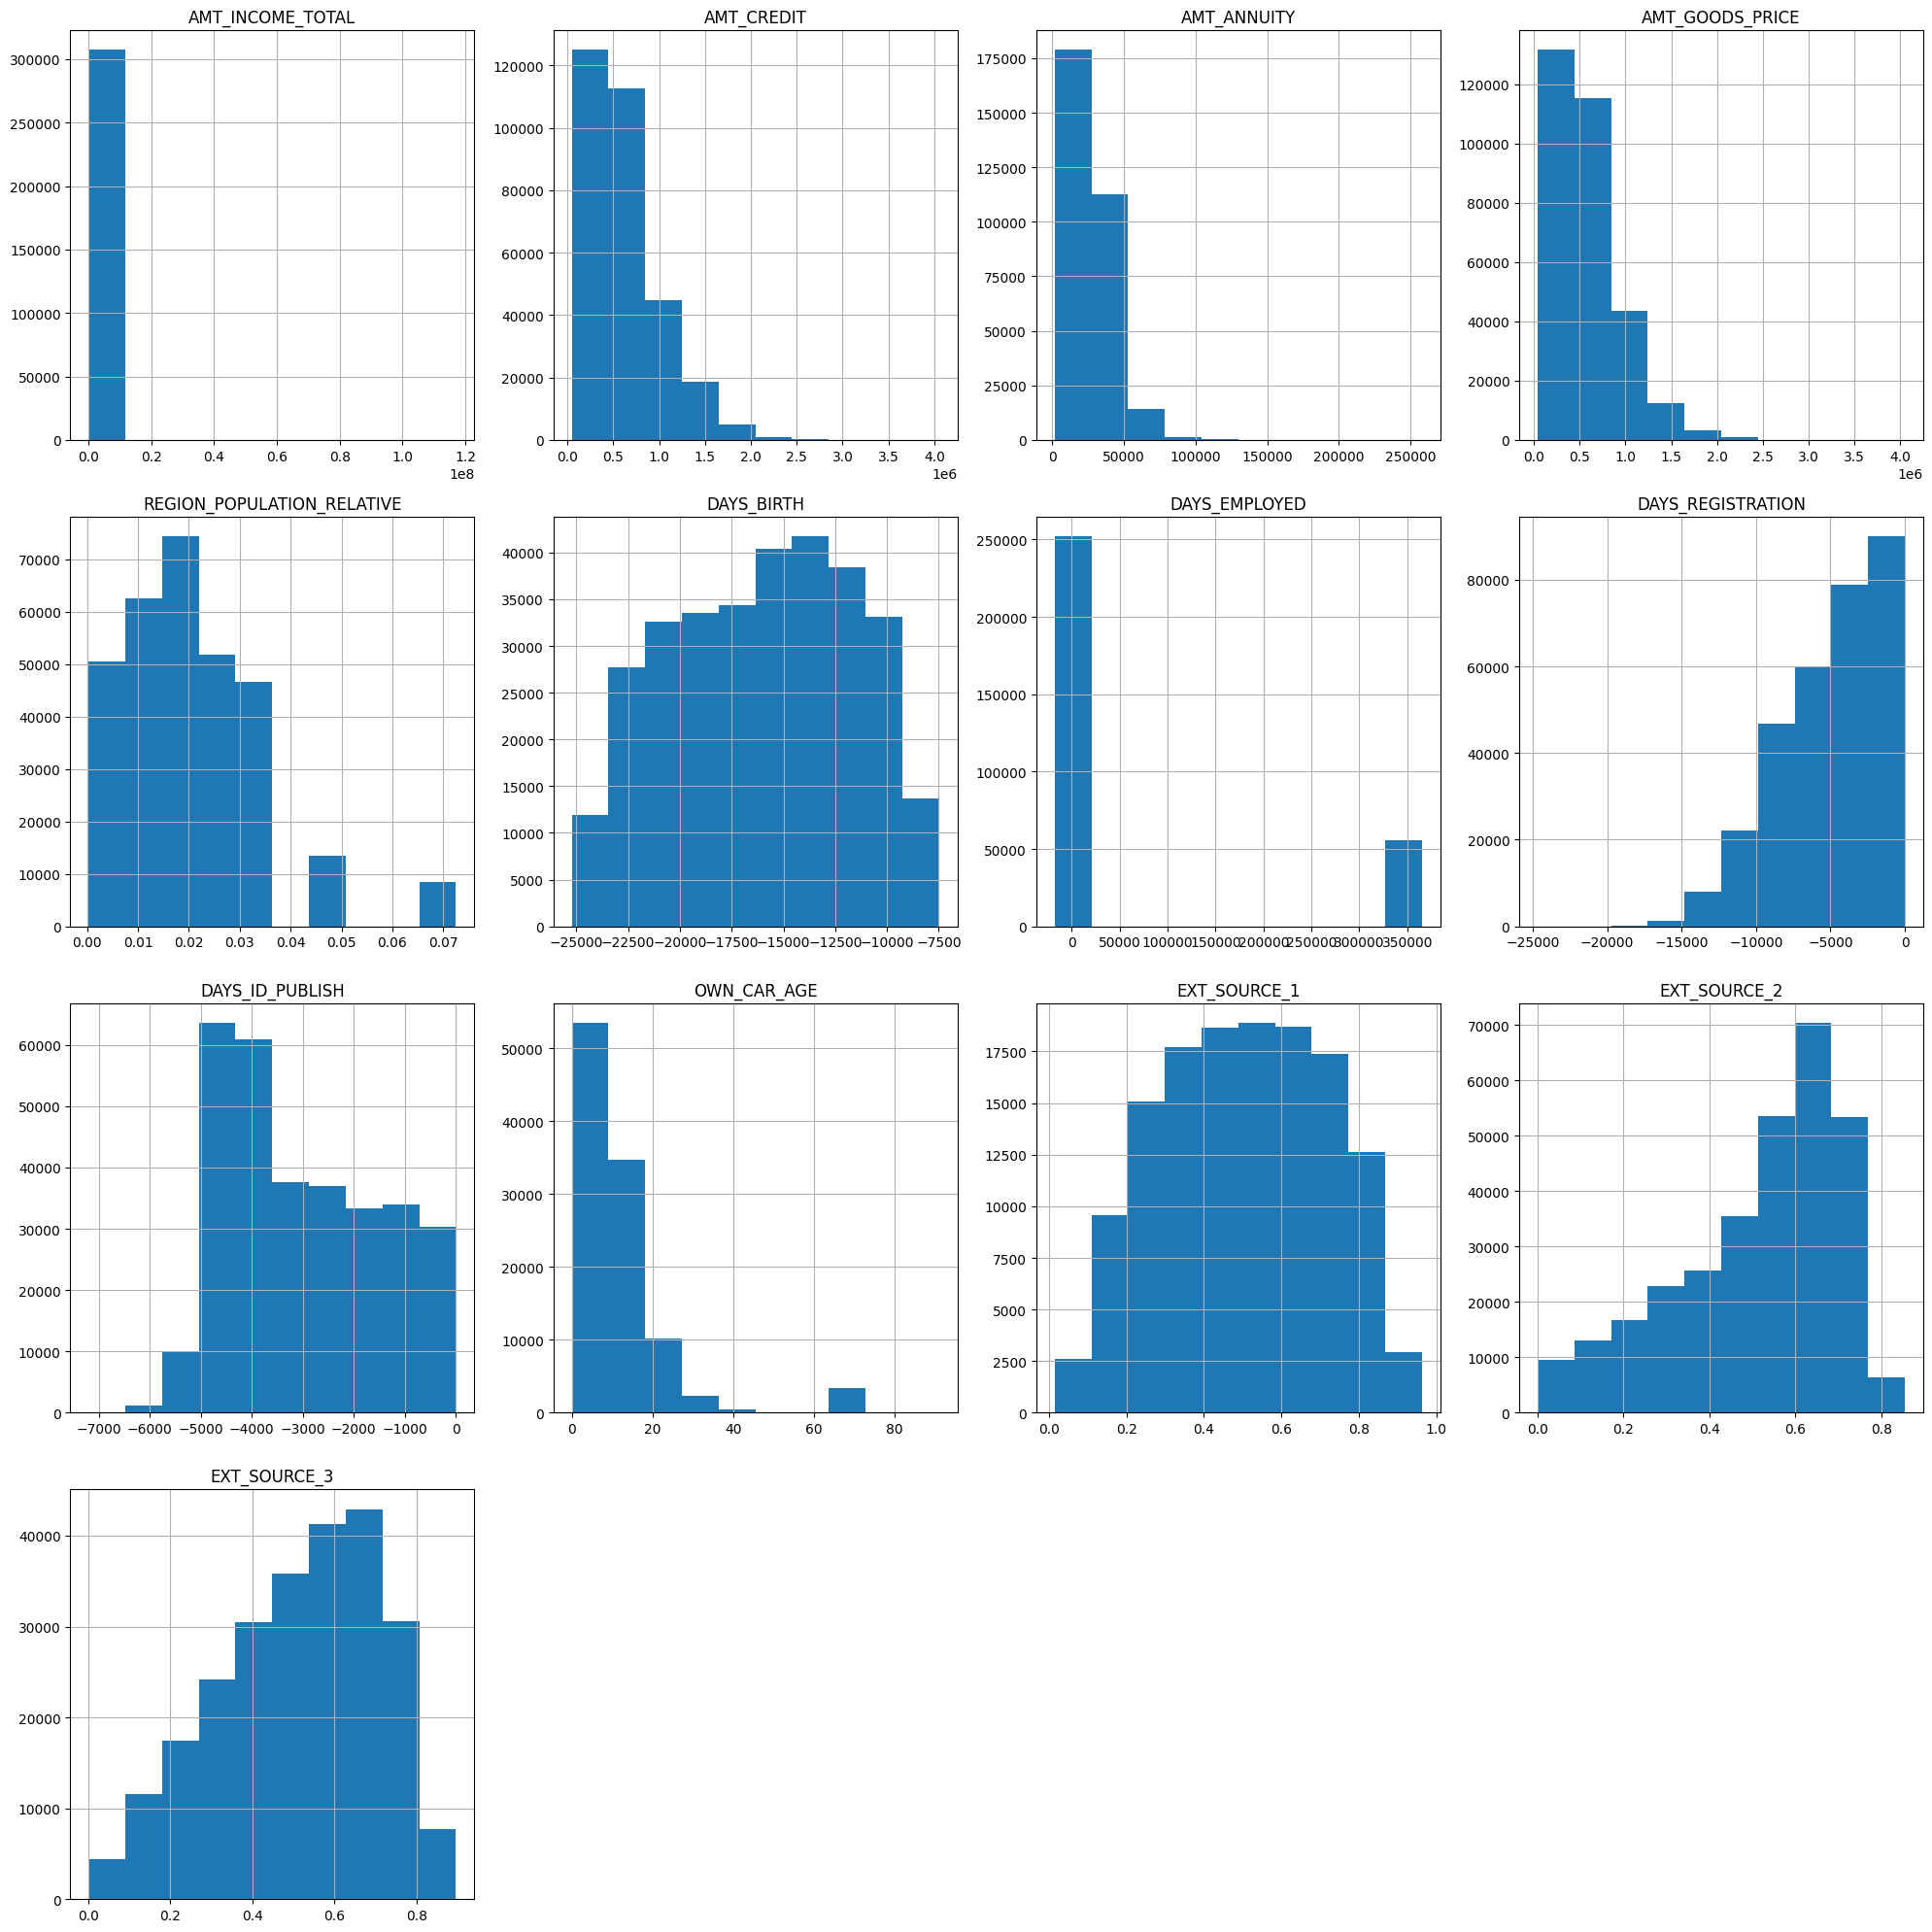

In [8]:
cont_var = ["AMT_INCOME_TOTAL",
            "AMT_CREDIT",
            "AMT_ANNUITY",
            "AMT_GOODS_PRICE",
            "REGION_POPULATION_RELATIVE",
            "DAYS_BIRTH",
            "DAYS_EMPLOYED",
            "DAYS_REGISTRATION",
            "DAYS_ID_PUBLISH",
            "OWN_CAR_AGE",
            "EXT_SOURCE_1",
            "EXT_SOURCE_2",
            "EXT_SOURCE_3"]


app_data[cont_var].hist(figsize=(20,20))
plt.tight_layout()

#### Bar Chart - Relevant Discrete & Categorical Variables

[Text(0, 0, 'Business Entity Type 3'),
 Text(1, 0, 'School'),
 Text(2, 0, 'Government'),
 Text(3, 0, 'Religion'),
 Text(4, 0, 'Other'),
 Text(5, 0, 'XNA'),
 Text(6, 0, 'Electricity'),
 Text(7, 0, 'Medicine'),
 Text(8, 0, 'Business Entity Type 2'),
 Text(9, 0, 'Self-employed'),
 Text(10, 0, 'Transport: type 2'),
 Text(11, 0, 'Construction'),
 Text(12, 0, 'Housing'),
 Text(13, 0, 'Kindergarten'),
 Text(14, 0, 'Trade: type 7'),
 Text(15, 0, 'Industry: type 11'),
 Text(16, 0, 'Military'),
 Text(17, 0, 'Services'),
 Text(18, 0, 'Security Ministries'),
 Text(19, 0, 'Transport: type 4'),
 Text(20, 0, 'Industry: type 1'),
 Text(21, 0, 'Emergency'),
 Text(22, 0, 'Security'),
 Text(23, 0, 'Trade: type 2'),
 Text(24, 0, 'University'),
 Text(25, 0, 'Transport: type 3'),
 Text(26, 0, 'Police'),
 Text(27, 0, 'Business Entity Type 1'),
 Text(28, 0, 'Postal'),
 Text(29, 0, 'Industry: type 4'),
 Text(30, 0, 'Agriculture'),
 Text(31, 0, 'Restaurant'),
 Text(32, 0, 'Culture'),
 Text(33, 0, 'Hotel'),
 Tex

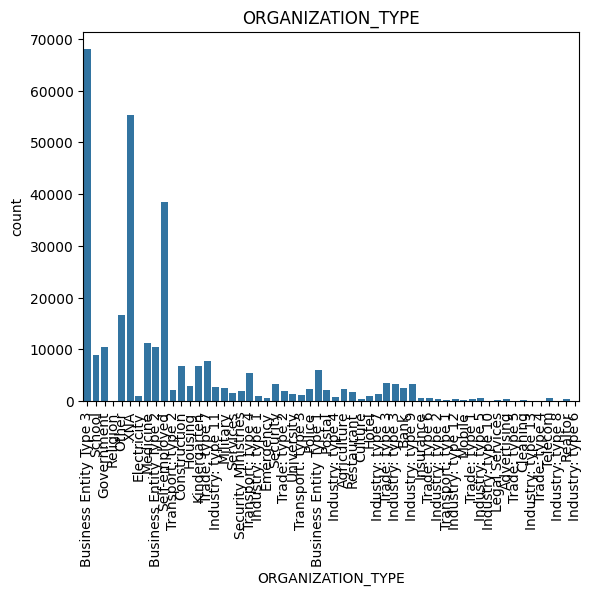

In [9]:
ax = sns.countplot(x= app_data['ORGANIZATION_TYPE'])
plt.title('ORGANIZATION_TYPE')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### Count distribution of Flag Documents

In [10]:
### Get distribution of Flag Documents 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
variable_name = "FLAG_DOCUMENT_"
for i in range(2,22):
    print("FLAG_DOCUMENT_"+str(i))
    print(app_data["FLAG_DOCUMENT_"+str(i)].value_counts())
    print("")

FLAG_DOCUMENT_2
FLAG_DOCUMENT_2
0    307498
1        13
Name: count, dtype: int64

FLAG_DOCUMENT_3
FLAG_DOCUMENT_3
1    218340
0     89171
Name: count, dtype: int64

FLAG_DOCUMENT_4
FLAG_DOCUMENT_4
0    307486
1        25
Name: count, dtype: int64

FLAG_DOCUMENT_5
FLAG_DOCUMENT_5
0    302863
1      4648
Name: count, dtype: int64

FLAG_DOCUMENT_6
FLAG_DOCUMENT_6
0    280433
1     27078
Name: count, dtype: int64

FLAG_DOCUMENT_7
FLAG_DOCUMENT_7
0    307452
1        59
Name: count, dtype: int64

FLAG_DOCUMENT_8
FLAG_DOCUMENT_8
0    282487
1     25024
Name: count, dtype: int64

FLAG_DOCUMENT_9
FLAG_DOCUMENT_9
0    306313
1      1198
Name: count, dtype: int64

FLAG_DOCUMENT_10
FLAG_DOCUMENT_10
0    307504
1         7
Name: count, dtype: int64

FLAG_DOCUMENT_11
FLAG_DOCUMENT_11
0    306308
1      1203
Name: count, dtype: int64

FLAG_DOCUMENT_12
FLAG_DOCUMENT_12
0    307509
1         2
Name: count, dtype: int64

FLAG_DOCUMENT_13
FLAG_DOCUMENT_13
0    306427
1      1084
Name: count, dtype: int

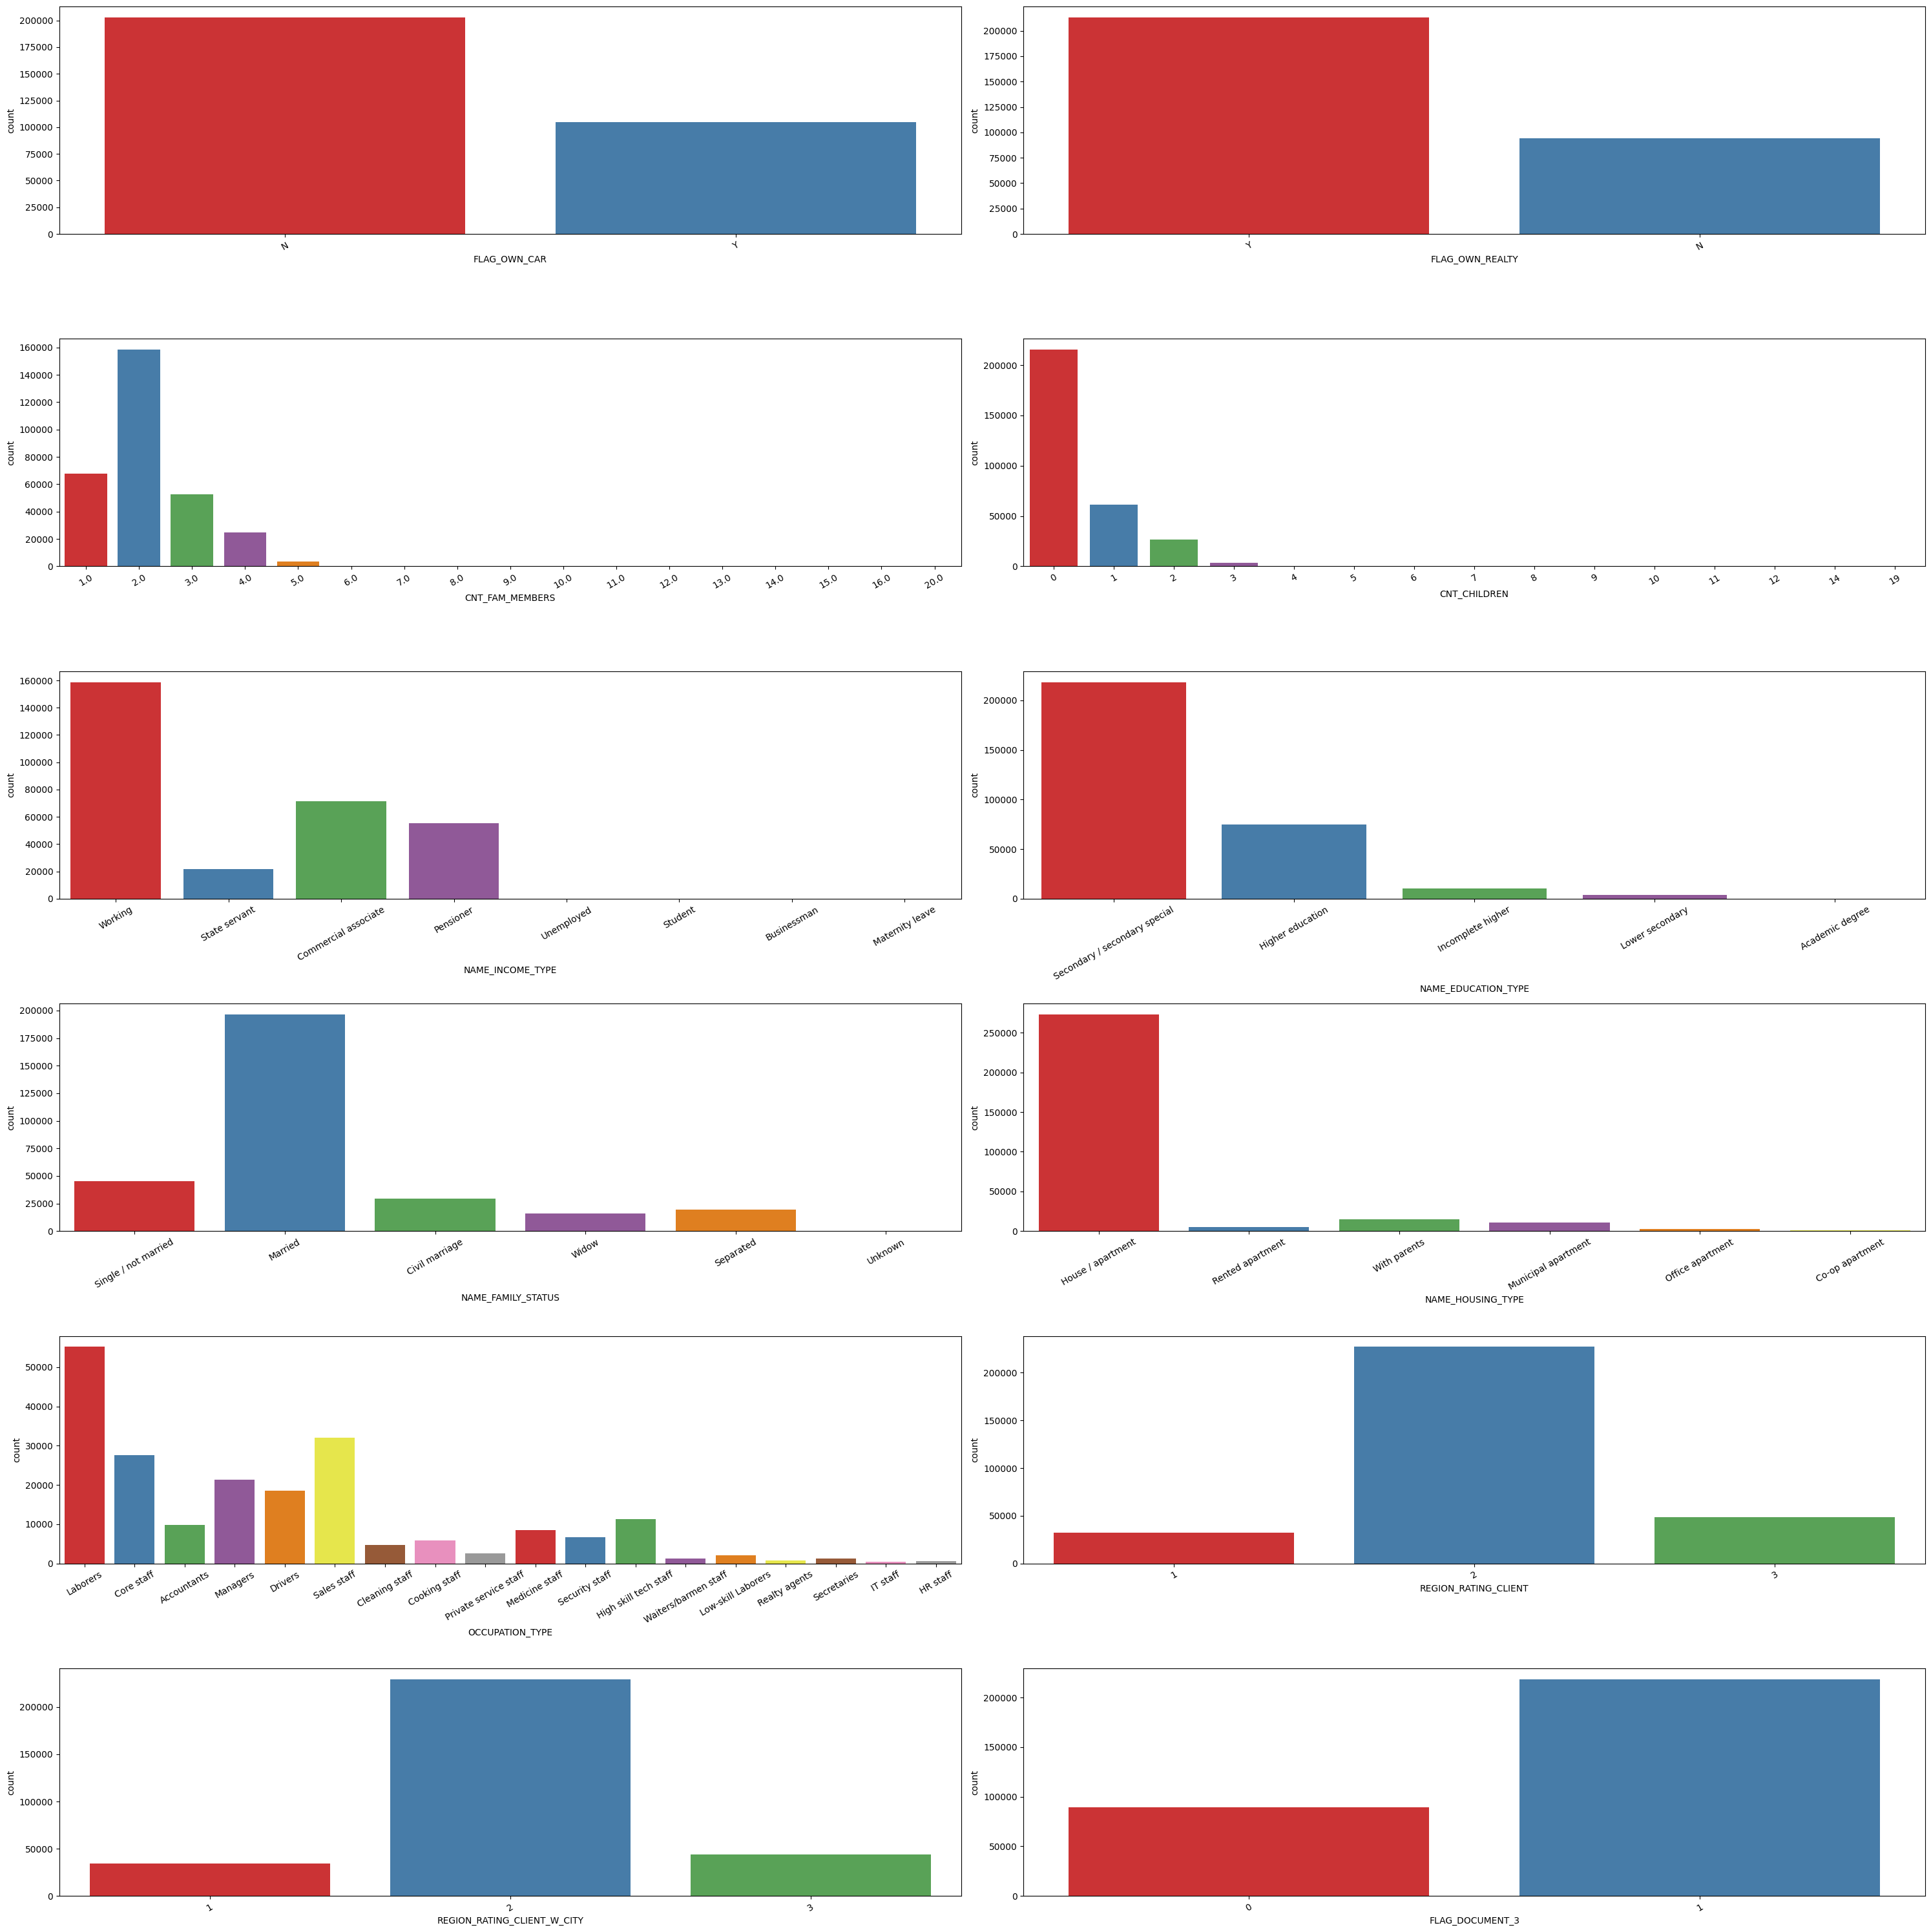

In [11]:
disc_cat_var = ["FLAG_OWN_CAR",
            "FLAG_OWN_REALTY",
            "CNT_FAM_MEMBERS",
            "CNT_CHILDREN",
            "NAME_INCOME_TYPE",
            "NAME_EDUCATION_TYPE",
            "NAME_FAMILY_STATUS",
            "NAME_HOUSING_TYPE",
            "OCCUPATION_TYPE",
            "REGION_RATING_CLIENT",
            "REGION_RATING_CLIENT_W_CITY",
            "FLAG_DOCUMENT_3",
]


row_count=int(np.ceil(len(disc_cat_var)/2))

fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(30,30))

for i, axis in enumerate(fig.axes):
    sns.countplot(ax=axis, x=app_data[disc_cat_var[i]],orient='h', palette="Set1")
    axis.set_xlabel(str(disc_cat_var[i]))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=30)
    if i == len(disc_cat_var)-1: 
         break

plt.tight_layout()

### Bureau Data

#### Bar Chart - Relevant Discrete & Categorical Variables

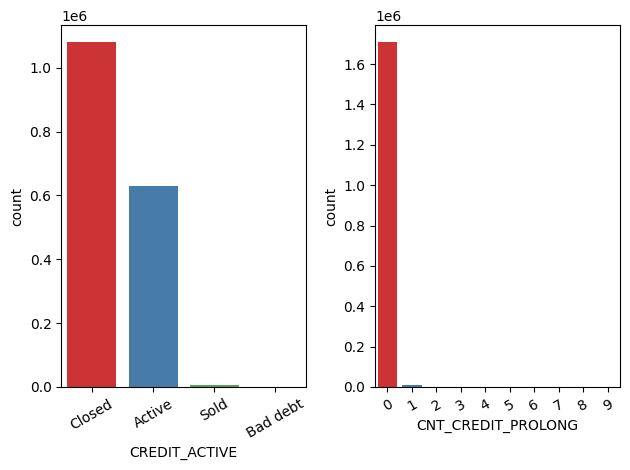

In [12]:
disc_cat_var_bureau = ["CREDIT_ACTIVE",
                       "CNT_CREDIT_PROLONG"]

row_count=int(np.ceil(len(disc_cat_var_bureau)/2))

fig, axes = plt.subplots(ncols=2, nrows=row_count)

for i, axis in enumerate(fig.axes):
    sns.countplot(ax=axis, x=bureau_data[disc_cat_var_bureau[i]],orient='h', palette="Set1")
    axis.set_xlabel(str(disc_cat_var_bureau[i]))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=30)
    if i == len(disc_cat_var_bureau)-1: 
         break
    
plt.tight_layout()

## 1.2 Bivariate Analysis

### Application Data

#### KDE Plot - Relevant Continuous Variables 

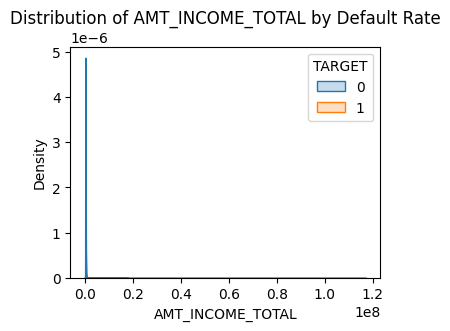

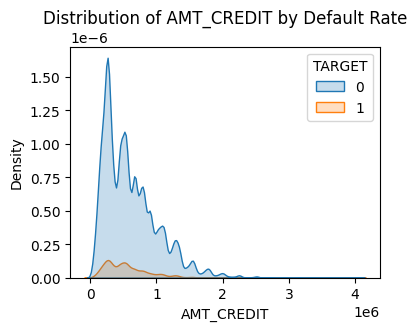

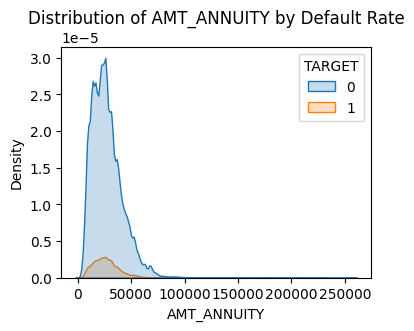

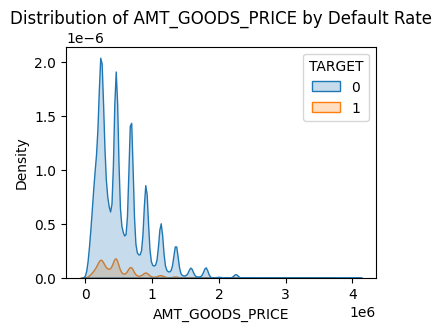

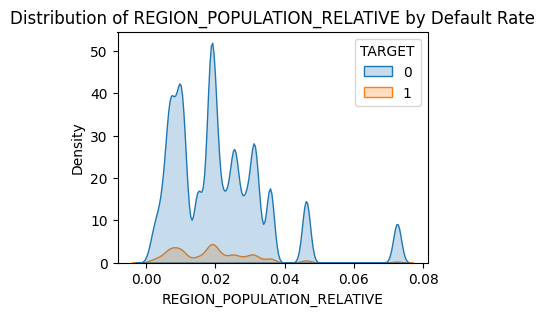

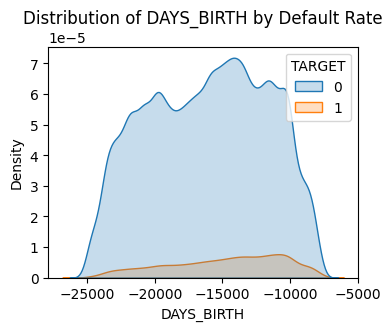

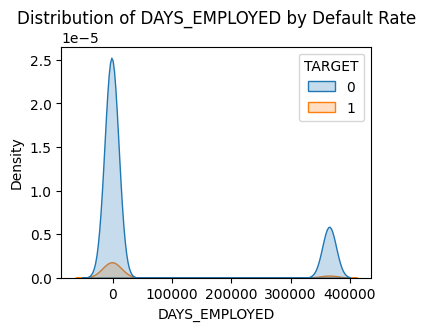

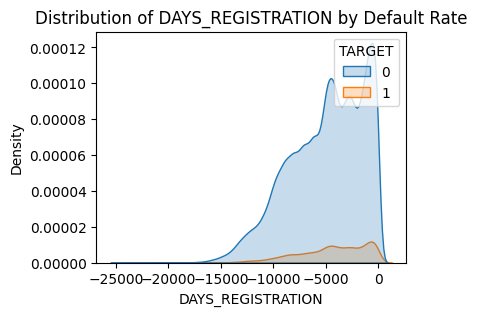

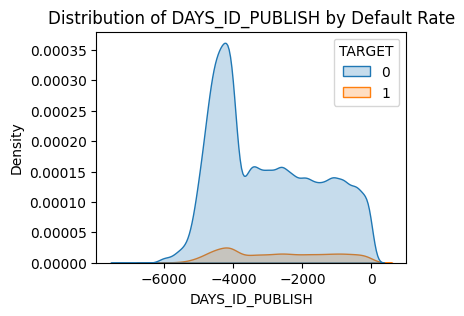

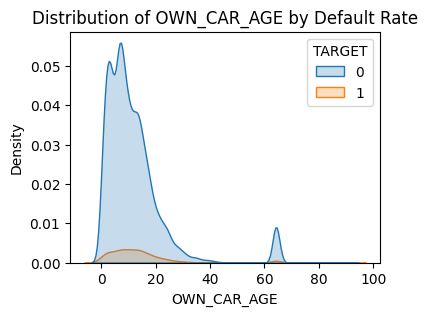

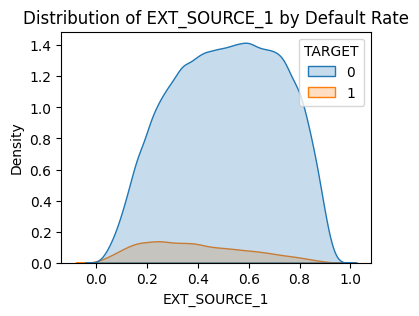

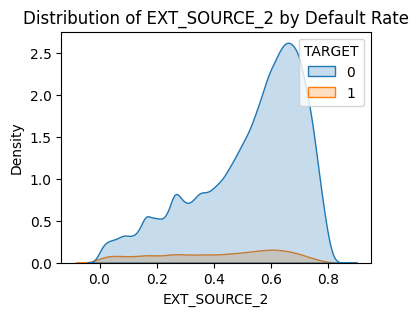

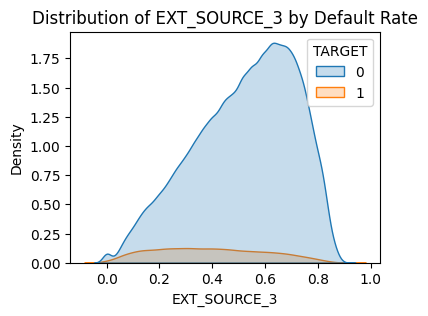

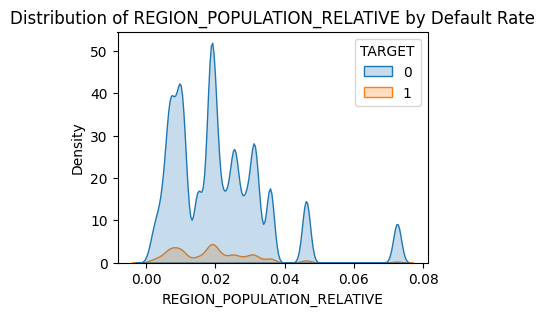

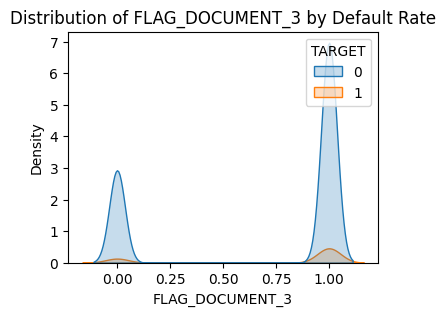

In [13]:

cont_var = ["AMT_INCOME_TOTAL",
            "AMT_CREDIT",
            "AMT_ANNUITY",
            "AMT_GOODS_PRICE",
            "REGION_POPULATION_RELATIVE",
            "DAYS_BIRTH",
            "DAYS_EMPLOYED",
            "DAYS_REGISTRATION",
            "DAYS_ID_PUBLISH",
            "OWN_CAR_AGE",
            "EXT_SOURCE_1",
            "EXT_SOURCE_2",
            "EXT_SOURCE_3",
            "REGION_POPULATION_RELATIVE",
            "FLAG_DOCUMENT_3"]


for i in range(len(cont_var)):
    plt.figure(figsize=(4,3))
    sns.kdeplot(data=app_data, x=cont_var[i], hue="TARGET", fill = True)
    title = "Distribution of " + cont_var[i] + " by Default Rate"
    plt.title(title)

#### Bar Charts - Relevant Discrete & Categorical Data

[Text(0, 0, 'Business Entity Type 3'),
 Text(1, 0, 'School'),
 Text(2, 0, 'Government'),
 Text(3, 0, 'Religion'),
 Text(4, 0, 'Other'),
 Text(5, 0, 'XNA'),
 Text(6, 0, 'Electricity'),
 Text(7, 0, 'Medicine'),
 Text(8, 0, 'Business Entity Type 2'),
 Text(9, 0, 'Self-employed'),
 Text(10, 0, 'Transport: type 2'),
 Text(11, 0, 'Construction'),
 Text(12, 0, 'Housing'),
 Text(13, 0, 'Kindergarten'),
 Text(14, 0, 'Trade: type 7'),
 Text(15, 0, 'Industry: type 11'),
 Text(16, 0, 'Military'),
 Text(17, 0, 'Services'),
 Text(18, 0, 'Security Ministries'),
 Text(19, 0, 'Transport: type 4'),
 Text(20, 0, 'Industry: type 1'),
 Text(21, 0, 'Emergency'),
 Text(22, 0, 'Security'),
 Text(23, 0, 'Trade: type 2'),
 Text(24, 0, 'University'),
 Text(25, 0, 'Transport: type 3'),
 Text(26, 0, 'Police'),
 Text(27, 0, 'Business Entity Type 1'),
 Text(28, 0, 'Postal'),
 Text(29, 0, 'Industry: type 4'),
 Text(30, 0, 'Agriculture'),
 Text(31, 0, 'Restaurant'),
 Text(32, 0, 'Culture'),
 Text(33, 0, 'Hotel'),
 Tex

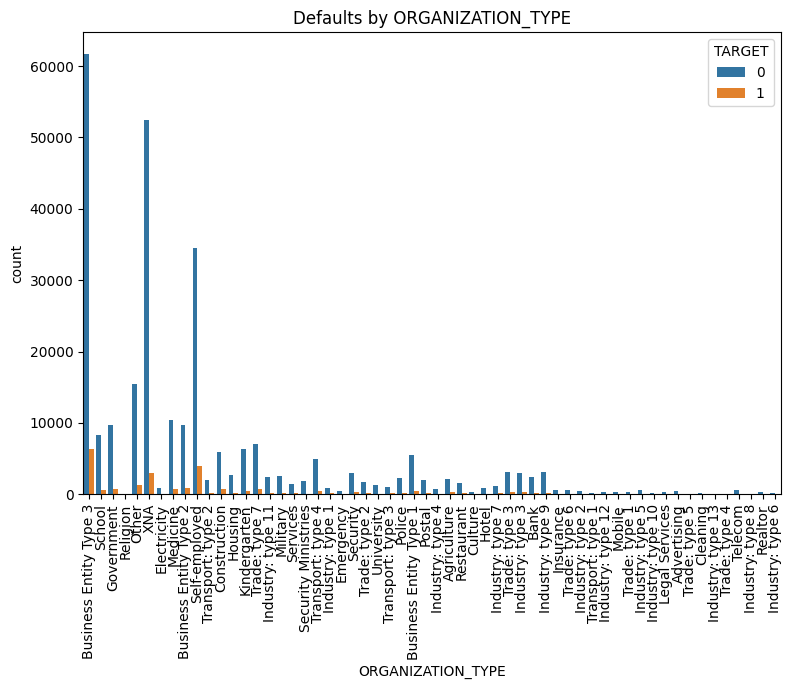

In [14]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x= app_data['ORGANIZATION_TYPE'], hue=app_data['TARGET'])
plt.title('Defaults by ORGANIZATION_TYPE')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

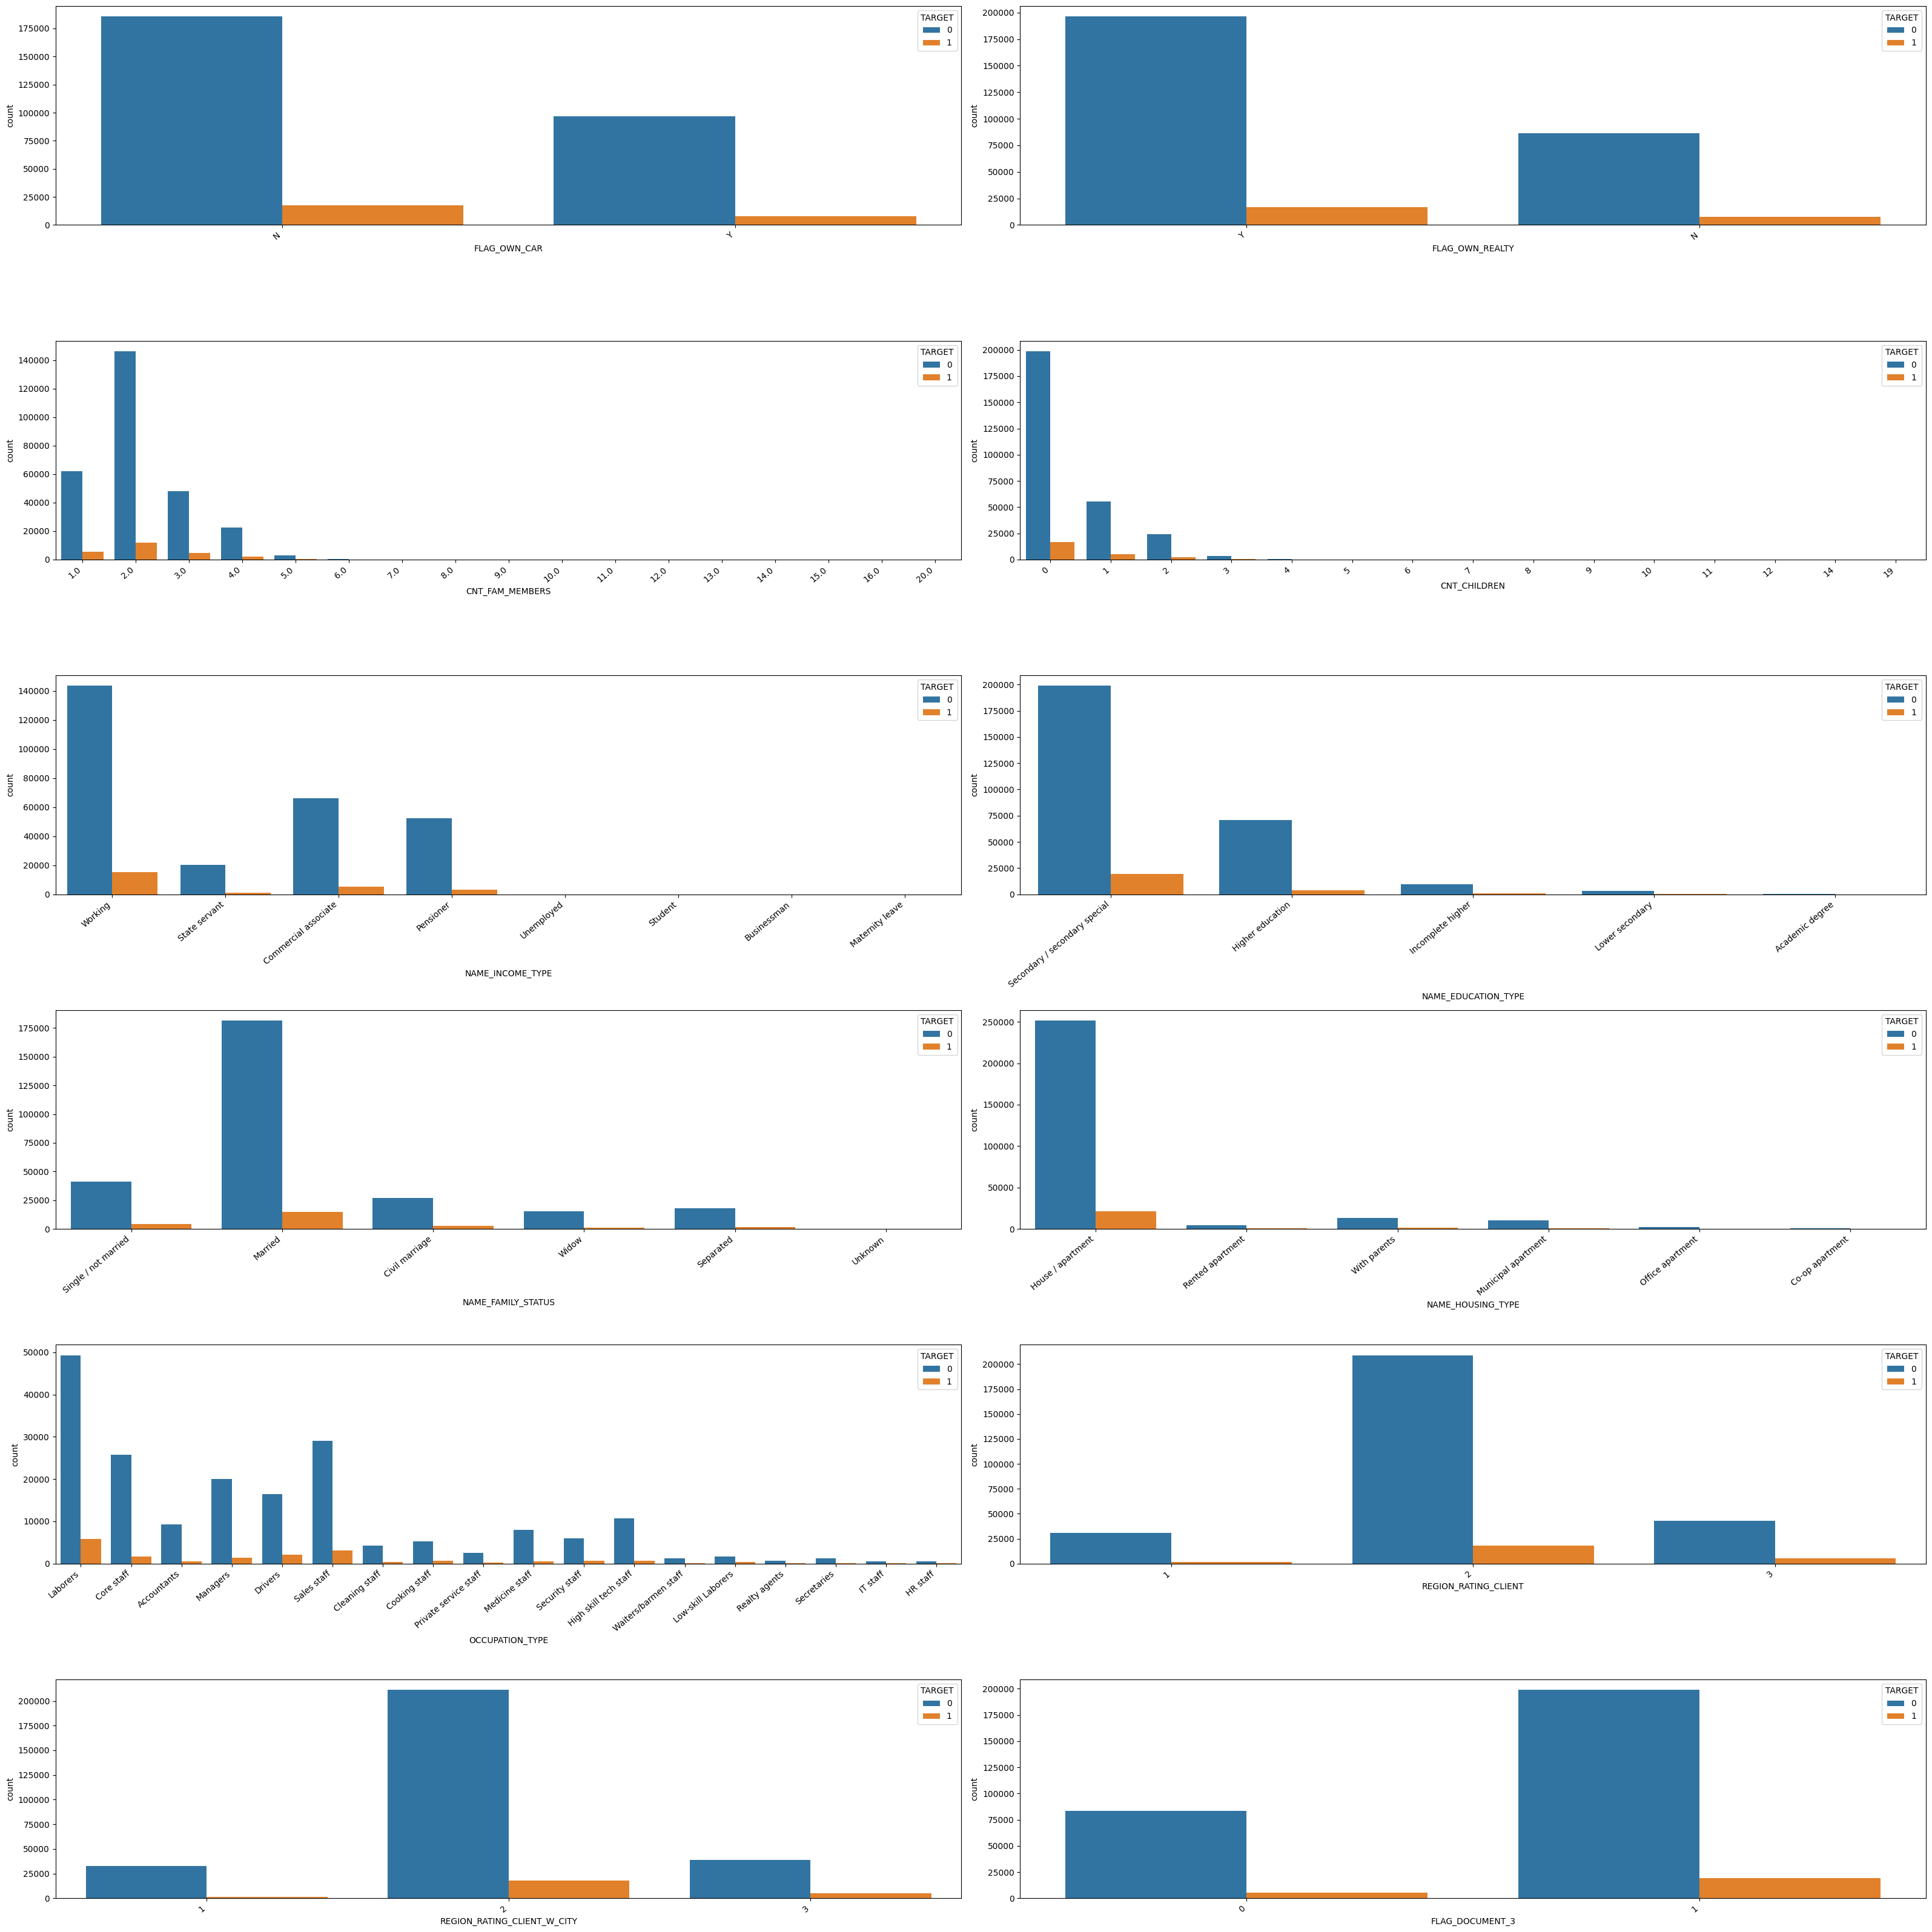

In [15]:
row_count=int(np.ceil(len(disc_cat_var)/2))
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 32))

for i, axis in enumerate(fig.axes):
    sns.countplot(ax=axis, x= app_data[disc_cat_var[i]], hue=app_data['TARGET'])
    axis.set_xlabel(str(disc_cat_var[i]))
    axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")

    if i == len(disc_cat_var)-1: 
         break
    
# Show the plot
plt.tight_layout()

#### Stacked Bar Charts - Relevant Discrete & Categorical Data

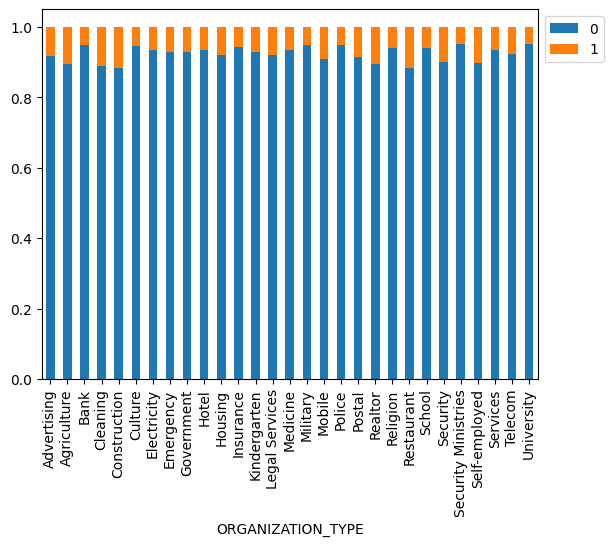

In [16]:
## tried to do smth similar to g2t5's key insights portion to show that default rate for self-employed is q high among organisation_type to prove our point that its harder for self-employed to obtain loans 
## so we want to address lack of loan options for this grp
## but i think its not rly conclusive ;-; prob can j remove HAAHAH

drop = ["Business Entity Type 1","Business Entity Type 2","Business Entity Type 3","Industry: type 1","Industry: type 2", "Industry: type 3",
       "Industry: type 4", "Industry: type 5", "Industry: type 6", "Industry: type 7", "Industry: type 8", "Industry: type 9", "Industry: type 10",
       "Industry: type 11", "Industry: type 12", "Industry: type 13", "Trade: type 1", "Trade: type 2", "Trade: type 3","Trade: type 4",
       "Trade: type 5", "Trade: type 6", "Trade: type 7","Transport: type 1", "Transport: type 2", "Transport: type 3", "Transport: type 4",
       "Other", "XNA"]
for val in drop:
    app_data = app_data.drop(app_data[app_data['ORGANIZATION_TYPE'] == val].index)



df_reason_bivariate = app_data.groupby('ORGANIZATION_TYPE')['TARGET'].value_counts(normalize = True).unstack()
ax = df_reason_bivariate.plot(kind='bar', stacked='True')
ax.legend(bbox_to_anchor=(1.0, 1.0))

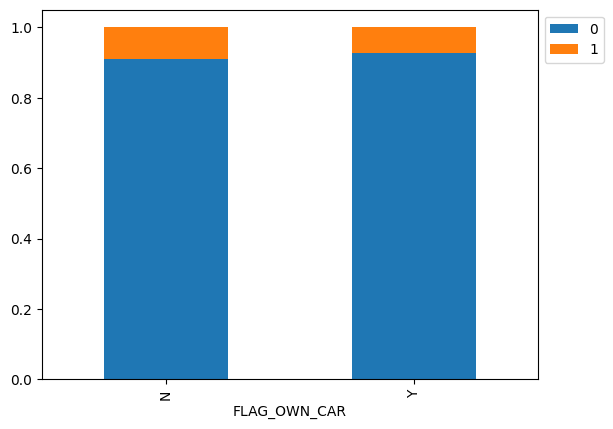

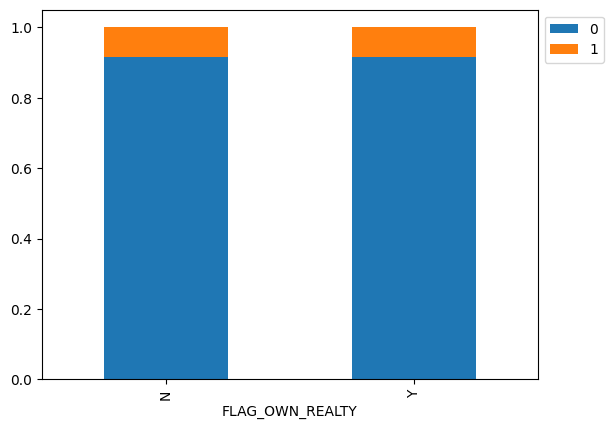

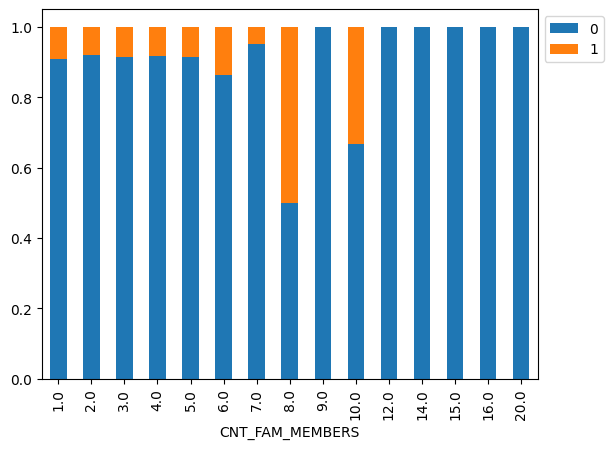

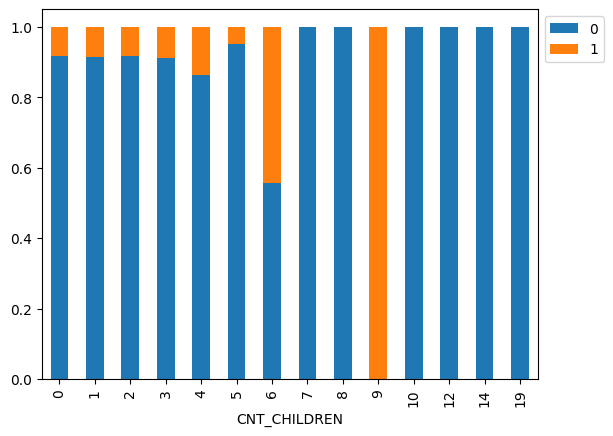

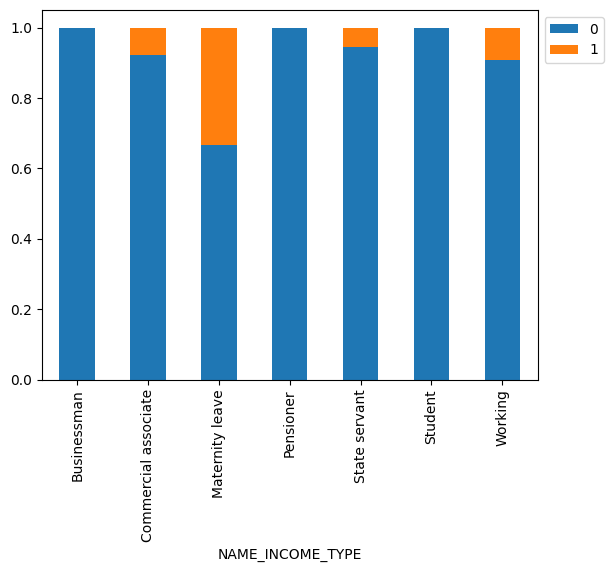

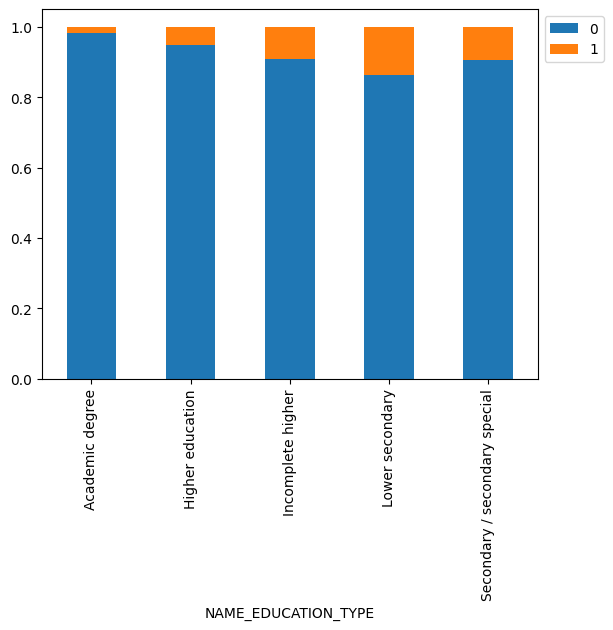

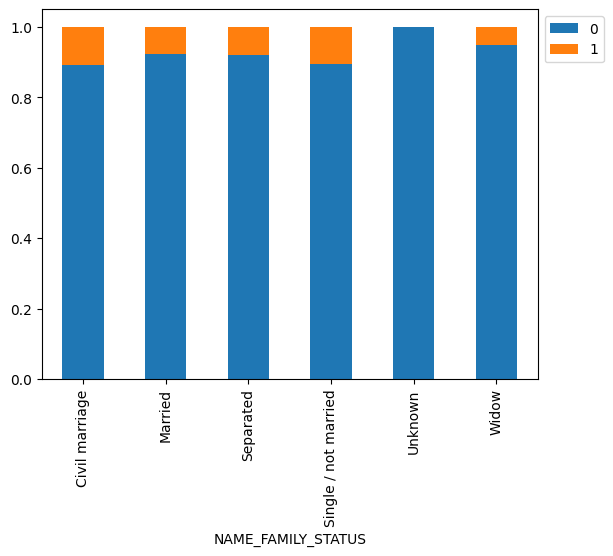

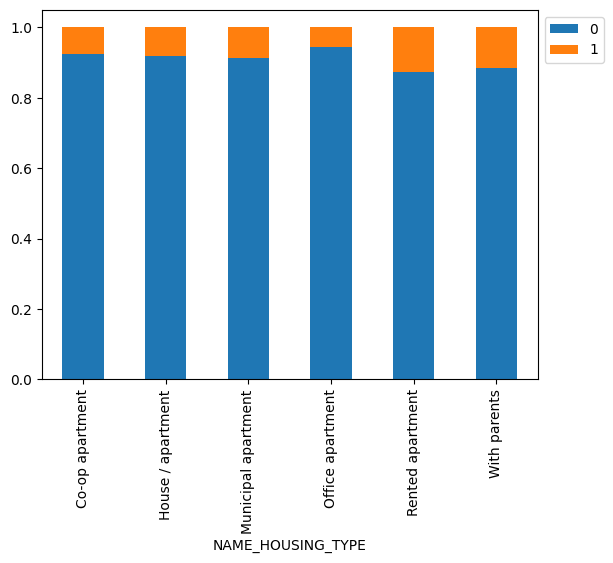

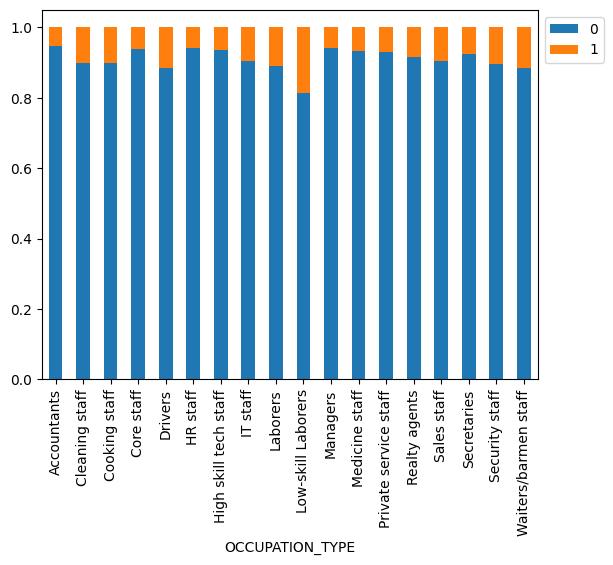

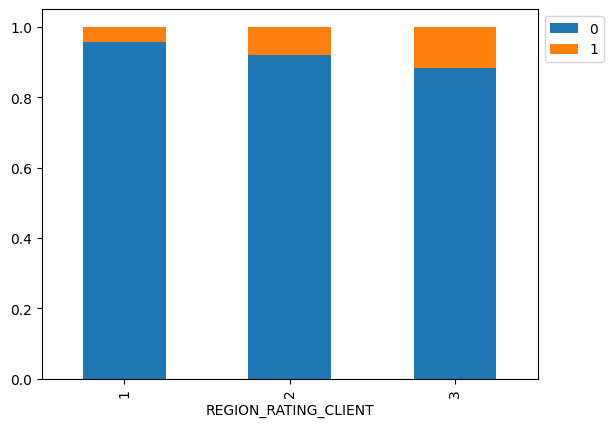

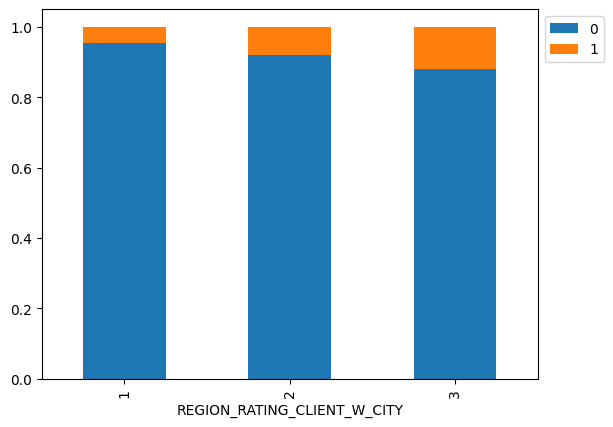

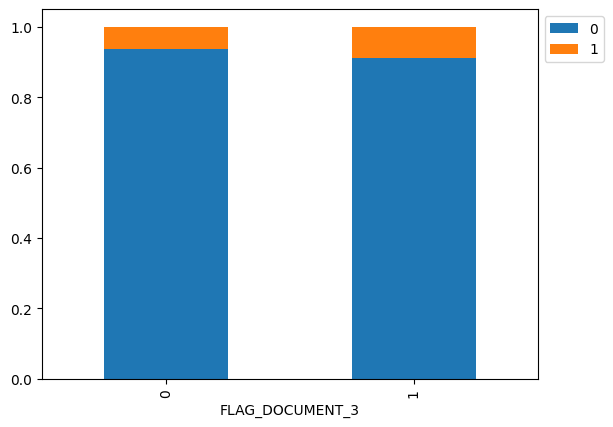

In [17]:
row_count=int(np.ceil(len(disc_cat_var)/2))

for i in disc_cat_var:
    df_reason_bivariate = app_data.groupby(i)['TARGET'].value_counts(normalize = True).unstack()
    ax = df_reason_bivariate.plot(kind='bar', stacked='True')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    if i == len(disc_cat_var)-1: 
         break
plt.show()

## 2. Data Preparation

## 2.1 Feature Selection & Extraction from application_data
#### Select Columns and Filter Out Self-Employed & Age (application_data.csv)


In [18]:
# list of selected cols from applicate_data.csv
selected_cols_application = ["SK_ID_CURR", 
                              "TARGET",
                              'AMT_ANNUITY', 
                              'REGION_POPULATION_RELATIVE',
                              "FLAG_OWN_CAR",
                              "FLAG_OWN_REALTY",
                              "CNT_CHILDREN",
                              "AMT_INCOME_TOTAL",
                              "AMT_CREDIT",
                              "AMT_GOODS_PRICE",
                              "NAME_INCOME_TYPE",
                              "NAME_EDUCATION_TYPE",
                              "NAME_FAMILY_STATUS",
                              "NAME_HOUSING_TYPE",
                              "DAYS_BIRTH",
                              "DAYS_EMPLOYED",
                              "DAYS_REGISTRATION",
                              "DAYS_ID_PUBLISH",
                              "OWN_CAR_AGE",
                              "OCCUPATION_TYPE",
                              "CNT_FAM_MEMBERS",
                              "REGION_RATING_CLIENT",
                              "REGION_RATING_CLIENT_W_CITY",
                              "EXT_SOURCE_1",
                              "EXT_SOURCE_2",
                              "EXT_SOURCE_3",
                              "FLAG_DOCUMENT_3",
                              "OBS_30_CNT_SOCIAL_CIRCLE",
                              "DEF_30_CNT_SOCIAL_CIRCLE",
                              "OBS_60_CNT_SOCIAL_CIRCLE",
                              "DEF_60_CNT_SOCIAL_CIRCLE",
                              "AMT_REQ_CREDIT_BUREAU_HOUR",
                              "AMT_REQ_CREDIT_BUREAU_DAY",
                              "AMT_REQ_CREDIT_BUREAU_WEEK",
                              "AMT_REQ_CREDIT_BUREAU_MON",
                              "AMT_REQ_CREDIT_BUREAU_QRT",
                              "AMT_REQ_CREDIT_BUREAU_YEAR"]

# extract selected columns and filter by self-employed
filtered_app_data = app_data[app_data['ORGANIZATION_TYPE'] == 'Self-employed'][selected_cols_application]
filtered_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38412 entries, 13 to 307504
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   38412 non-null  int64  
 1   TARGET                       38412 non-null  int64  
 2   AMT_ANNUITY                  38409 non-null  float64
 3   REGION_POPULATION_RELATIVE   38412 non-null  float64
 4   FLAG_OWN_CAR                 38412 non-null  object 
 5   FLAG_OWN_REALTY              38412 non-null  object 
 6   CNT_CHILDREN                 38412 non-null  int64  
 7   AMT_INCOME_TOTAL             38412 non-null  float64
 8   AMT_CREDIT                   38412 non-null  float64
 9   AMT_GOODS_PRICE              38360 non-null  float64
 10  NAME_INCOME_TYPE             38412 non-null  object 
 11  NAME_EDUCATION_TYPE          38412 non-null  object 
 12  NAME_FAMILY_STATUS           38412 non-null  object 
 13  NAME_HOUSING_TYPE  

#### Derive Age Variable

In [19]:
# create AGE, YEARS_EMPLOYED variable using DAYS_BIRTH, DAYS_EMPLOYED
filtered_app_data['AGE'] = filtered_app_data['DAYS_BIRTH']/-365
filtered_app_data['AGE'] = filtered_app_data['AGE'].astype(int)

filtered_app_data['YEARS_EMPLOYED'] = filtered_app_data['DAYS_EMPLOYED']/-365
filtered_app_data['YEARS_EMPLOYED'] = filtered_app_data['YEARS_EMPLOYED'].astype(int)

# drop DAYS_BIRTH, DAYS_EMPLOYED  variables - no longer needed since AGE,YEARS_EMPLOYED already exists
filtered_app_data.drop("DAYS_BIRTH", axis=1, inplace=True)
filtered_app_data.drop("DAYS_EMPLOYED", axis=1, inplace=True)

#### Applicants aged between 21 - 35

In [20]:
# Select records with applicants aged between 18 and 35
filtered_app_data = filtered_app_data[(filtered_app_data["AGE"] >= 18) & (filtered_app_data["AGE"] <= 35)]

#### Applicants with credit amount < 500k

In [21]:
# Select records with applicants with credit amount < 500k
filtered_app_data = filtered_app_data[(filtered_app_data["AMT_CREDIT"] <= 500000)]
filtered_app_data.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET  AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
22          100026       0     32521.50                        0.02   
35          100041       0     44509.50                        0.01   
45          100052       0      9000.00                        0.01   
53          100061       0     16164.00                        0.01   
77          100089       0     15781.50                        0.03   
...            ...     ...          ...                         ...   
307353      456078       0     21339.00                        0.04   
307383      456108       1     33444.00                        0.02   
307385      456110       0      9000.00                        0.01   
307436      456174       0     17064.00                        0.02   
307457      456196       0     18000.00                        0.04   

       FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
22                N               N         

In [22]:
# identify columns with NULL values
filtered_app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
AMT_ANNUITY                       0
REGION_POPULATION_RELATIVE        0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_GOODS_PRICE                  22
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                    5447
OCCUPATION_TYPE                 739
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
EXT_SOURCE_1                   3570
EXT_SOURCE_2                     19
EXT_SOURCE_3                   2456
FLAG_DOCUMENT_3                   0
OBS_30_CNT_SOCIAL_CIRCLE         35
DEF_30_CNT_SOCIAL_CIRCLE         35
OBS_60_CNT_SOCIAL_CIRCLE    

#### Check Correlation of Variables

Correlation Heatmap: Application Data

<Axes: >

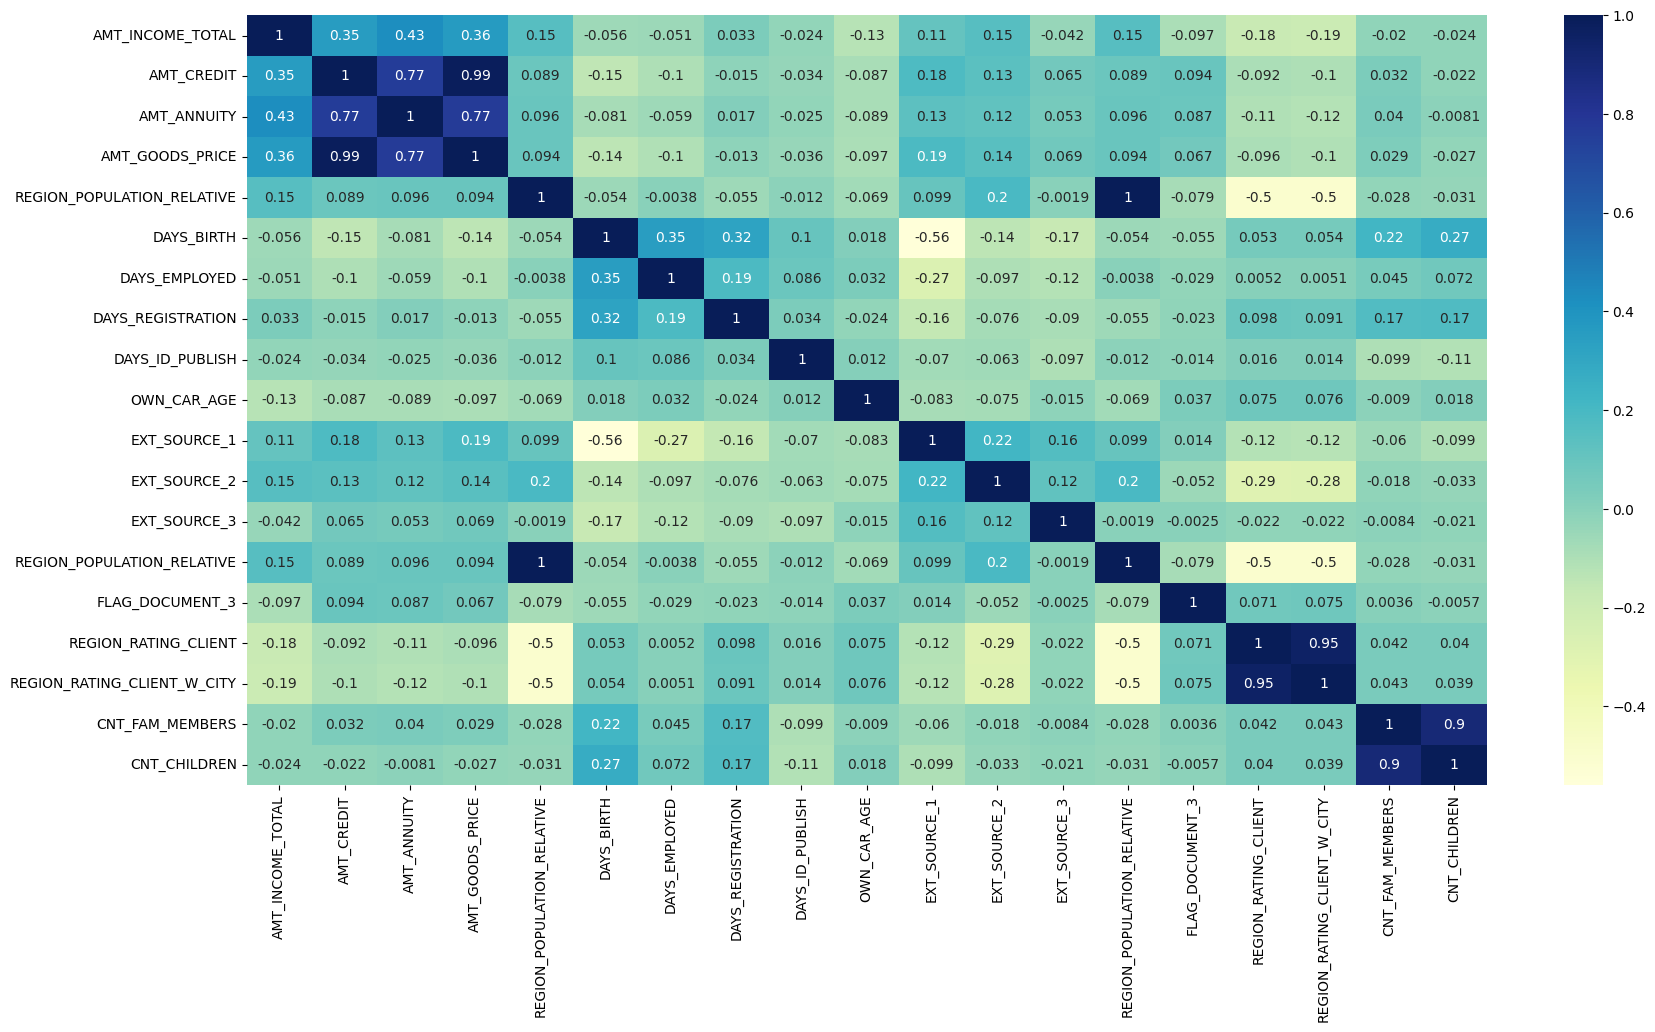

In [23]:
numerical_disc_var = ["REGION_RATING_CLIENT", 
                    "REGION_RATING_CLIENT_W_CITY", 
                    "CNT_FAM_MEMBERS",
                    "CNT_CHILDREN"]

numerical_var = cont_var + numerical_disc_var
        
corr_matrix = app_data[numerical_var].corr()

# plot heat map
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,annot=True,cmap="YlGnBu", ax=ax)

In [24]:
# Identify variables with highest correlation
# Set lower half of matrix to NaN
corr_matrix_top = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Convert to pivot table structure (panda series) to have both variables and their correlation in same row
corr_table = corr_matrix_top.stack()

# Locate variables with correlation > 0.5 (or indicated number)
corr_table_gt_0_5 = corr_table.loc[lambda x: x > 0.5]
print(corr_table_gt_0_5)

AMT_CREDIT                  AMT_ANNUITY                   0.77
                            AMT_GOODS_PRICE               0.99
AMT_ANNUITY                 AMT_GOODS_PRICE               0.77
REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE    1.00
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY   0.95
CNT_FAM_MEMBERS             CNT_CHILDREN                  0.90
dtype: float64


####  Highly correlated variables (r > 0.5)
- CNT_CHILDREN & CNT_FAM_MEMBERS: corr 0.9 --> drop CNT_CHILDREN as CNT_FAM_MEMBERS includes cnt_children
- AMT_CREDIT & AMT_ANNUITY: corr 0.73 --> drop AMT_ANNUITY as anuity is calculated from AMT_CREDIT
- AMT_CREDIT & AMT_GOODS_PRICE: corr 0.96 --> drop AMT_GOODS_PRICE as it is included in AMT_CREDIT
- AMT_ANNUITY & AMT_GOODS_PRICE: corr 0.71 --> dropped both as seen above
- AMT_CREDIT & DEBT_INCOME_RATIO: corr 0.59 --> drop AMT_CREDIT as it is included in DEBT_INCOME_RATIO
- REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY: corr 0.95 --> drop REGION_RATING_CLIENT
- REGION_POPULATION_RELATIVE : corr 1 --> drop variable cause duplicate

In [25]:
# Drop redundant variables
# Check if this is what we should drop
filtered_app_data = filtered_app_data.copy()
filtered_app_data.drop(["CNT_CHILDREN","AMT_GOODS_PRICE", "AMT_ANNUITY", "REGION_RATING_CLIENT", "CNT_FAM_MEMBERS","REGION_POPULATION_RELATIVE"], axis=1, inplace=True)
filtered_app_data

SK_ID_CURR  TARGET FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
22          100026       0            N               N         450000.00   
35          100041       0            N               N         112500.00   
45          100052       0            N               Y          90000.00   
53          100061       0            N               Y         225000.00   
77          100089       0            N               Y         135000.00   
...            ...     ...          ...             ...               ...   
307353      456078       0            N               Y         112500.00   
307383      456108       1            N               Y         135000.00   
307385      456110       0            Y               Y         180000.00   
307436      456174       0            N               N         135000.00   
307457      456196       0            N               Y         202500.00   

        AMT_CREDIT      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
22       497520.00               Working  Secondary / secondary special   
35       450000.00               Working               Higher education   
45       180000.00               Working  Secondary / secondary special   
53       314055.00  Commercial associate               Higher education   
77       337761.00               Working  Secondary / secondary special   
...            ...                   ...                            ...   
307353   390960.00               Working  Secondary / secondary special   
307383   457834.50               Working  Secondary / secondary special   
307385   180000.00  Commercial associate  Secondary / secondary special   
307436   215640.00               Working  Secondary / secondary special   
307457   360000.00  Commercial associate  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...  \
22                   Married   Rented apartment  ...   
35                   Married  House / apartment  ...   
45            Civil marriage  House / apartment  ...   
53                   Married  House / apartment  ...   
77            Civil marriage  House / apartment  ...   
...                      ...                ...  ...   
307353  Single / not married  House / apartment  ...   
307383               Married  House / apartment  ...   
307385               Married  House / apartment  ...   
307436               Married  House / apartment  ...   
307457        Civil marriage  House / apartment  ...   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
22                          0.00                      0.00   
35                          0.00                      0.00   
45                          1.00                      1.00   
53                          0.00                      0.00   
77                          2.00                      0.00   
...                          ...                       ...   
307353                      1.00                      0.00   
307383                      0.00                      0.00   
307385                      0.00                      0.00   
307436                      6.00                      0.00   
307457                      0.00                      0.00   

        AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
22                            0.00                      0.00   
35                            0.00                      0.00   
45                             NaN                       NaN   
53                            0.00                      0.00   
77                            0.00                      0.00   
...                            ...                       ...   
307353                         NaN                       NaN   
307383                        0.00                      0.00   
307385                        0.00                      0.00   
307436                        0.00                      0.00   
307457                        0.00                      0.00

Correlation Heatmap: Bureau Data

<AxesSubplot:>

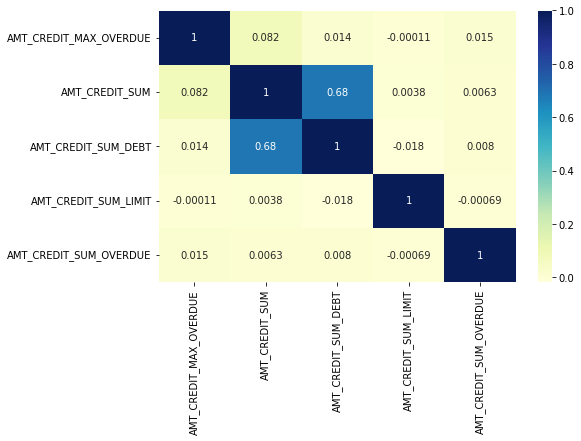

In [5]:
# sample code 
# generate correlation maxtrix
cont_var_bureau = ["AMT_CREDIT_MAX_OVERDUE",
                     "AMT_CREDIT_SUM",
                     "AMT_CREDIT_SUM_DEBT",
                     "AMT_CREDIT_SUM_LIMIT",
                     "AMT_CREDIT_SUM_OVERDUE"]

corr_matrix_bureau = bureau_data[cont_var_bureau].corr()

# plot heat map
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr_matrix_bureau,xticklabels=corr_matrix_bureau.columns,yticklabels=corr_matrix_bureau.columns,annot=True,cmap="YlGnBu", ax=ax)

In [7]:
# Identify variables with highest correlation
# Set lower half of matrix to NaN
corr_matrix_top_bureau = corr_matrix_bureau.where(np.triu(np.ones(corr_matrix_bureau.shape), k=1).astype(bool))

# Convert to pivot table structure (panda series) to have both variables and their correlation in same row
corr_table_bureau = corr_matrix_top_bureau.stack()

# Locate variables with correlation > 0.5 (or indicated number)
corr_table_gt_0_5_bureau = corr_table_bureau.loc[lambda x: x > 0.5]
print(corr_table_gt_0_5_bureau)

AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT   0.68
dtype: float64


## 2.2 Feature Extraction & Engineering

### Feature extraction from application_data

In [8]:
# Create DEBT_INCOME_RATIO variable
filtered_app_data['DEBT_INCOME_RATIO'] = filtered_app_data['AMT_CREDIT']/filtered_app_data['AMT_INCOME_TOTAL']
filtered_app_data['DEBT_INCOME_RATIO'] = filtered_app_data['DEBT_INCOME_RATIO'].astype(float)
filtered_app_data['DEBT_INCOME_RATIO'] = filtered_app_data['DEBT_INCOME_RATIO'].round(2)
# DROP AMT_CREDIT and AMT_INCOME_TOTAL
filtered_app_data.drop("AMT_CREDIT", axis=1, inplace=True)
filtered_app_data.drop("AMT_INCOME_TOTAL", axis=1, inplace=True)

filtered_app_data['DEBT_INCOME_RATIO']


NameError: name 'filtered_app_data' is not defined

In [9]:
# list selected columns
selected_cols_bureau = ["SK_ID_CURR",
                        "AMT_CREDIT_MAX_OVERDUE",
                        "CNT_CREDIT_PROLONG",
                        "AMT_CREDIT_SUM",
                        "AMT_CREDIT_SUM_DEBT",
                        "AMT_CREDIT_SUM_LIMIT",
                        "AMT_CREDIT_SUM_OVERDUE",
                        "CREDIT_ACTIVE",]

# extract selected columns of bureau data
filtered_bureau_data = bureau_data[selected_cols_bureau]
filtered_bureau_data

SK_ID_CURR  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
0            215354                     NaN                   0   
1            215354                     NaN                   0   
2            215354                     NaN                   0   
3            215354                     NaN                   0   
4            215354                77674.50                   0   
...             ...                     ...                 ...   
1716423      259355                    0.00                   0   
1716424      100044                 5476.50                   0   
1716425      100044                     NaN                   0   
1716426      246829                     NaN                   0   
1716427      246829                     NaN                   0   

         AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
0              91323.00                 0.00                   NaN   
1             225000.00            171342.00                   NaN   
2             464323.50                  NaN                   NaN   
3              90000.00                  NaN                   NaN   
4            2700000.00                  NaN                   NaN   
...                 ...                  ...                   ...   
1716423        11250.00             11250.00                  0.00   
1716424        38130.84                 0.00                  0.00   
1716425        15570.00                  NaN                   NaN   
1716426        36000.00                 0.00                  0.00   
1716427        22500.00                 0.00                   NaN   

         AMT_CREDIT_SUM_OVERDUE CREDIT_ACTIVE  
0                          0.00        Closed  
1                          0.00        Active  
2                          0.00        Active  
3                          0.00        Active  
4                          0.00        Active  
...                         ...           ...  
1716423                    0.00        Active  
1716424                    0.00        Closed  
1716425                    0.00        Closed  
1716426                    0.00        Closed  
1716427                    0.00        Closed  

[1716428 rows x 8 columns]

### Feature extraction from bureau_data

##### Number of Active Loans

In [10]:
# Create new column to count number of active loans using num_loan_dataset
active_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Active")].groupby("SK_ID_CURR").count())
active_loan.rename(columns={"CREDIT_ACTIVE": "NUM_ACTIVE_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_ACTIVE_LOANS
active_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

##### Number of Sold Loans

In [11]:
# Create new column to count number of sold loans using num_loan_dataset
sold_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Sold")].groupby("SK_ID_CURR").count())
sold_loan.rename(columns={"CREDIT_ACTIVE": "NUM_SOLD_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_SOLD_LOANS
sold_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

##### Number of Bad Debt Loans

In [12]:
# Create new column to count number of bad debt loans using num_loan_dataset
bad_debt_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Bad debt")].groupby("SK_ID_CURR").count())
bad_debt_loan.rename(columns={"CREDIT_ACTIVE": "NUM_BAD_DEBT_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_BAD_DEBT_LOANS
bad_debt_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

##### Number of Closed Loans

In [13]:
# Create new column to count number of closed loans using num_loan_dataset
closed_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Closed")].groupby("SK_ID_CURR").count())
closed_loan.rename(columns={"CREDIT_ACTIVE": "NUM_CLOSED_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_CLOSED_LOANS
closed_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

##### Combine Extracted Features & Add Total Loans Column

In [33]:
# Join all the above by SK_ID_CURR
num_loan_dataset = pd.merge(active_loan, sold_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset = pd.merge(num_loan_dataset, bad_debt_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset = pd.merge(num_loan_dataset, closed_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset.fillna(0, inplace=True)

num_loan_dataset

NUM_ACTIVE_LOANS  NUM_SOLD_LOANS  NUM_BAD_DEBT_LOANS  \
SK_ID_CURR                                                         
100001                  3.00            0.00                0.00   
100002                  2.00            0.00                0.00   
100003                  1.00            0.00                0.00   
100005                  2.00            0.00                0.00   
100008                  1.00            0.00                0.00   
...                      ...             ...                 ...   
456185                  0.00            0.00                0.00   
456191                  0.00            0.00                0.00   
456197                  0.00            0.00                0.00   
456237                  0.00            0.00                0.00   
456254                  0.00            0.00                0.00   

            NUM_CLOSED_LOANS  
SK_ID_CURR                    
100001                  4.00  
100002                  6.00  
100003                  3.00  
100005                  1.00  
100008                  2.00  
...                      ...  
456185                  5.00  
456191                  3.00  
456197                  7.00  
456237                  1.00  
456254                  1.00  

[305811 rows x 4 columns]

In [34]:
num_loan_dataset["TOTAL_LOANS"] = num_loan_dataset.sum(axis=1)
num_loan_dataset

NUM_ACTIVE_LOANS  NUM_SOLD_LOANS  NUM_BAD_DEBT_LOANS  \
SK_ID_CURR                                                         
100001                  3.00            0.00                0.00   
100002                  2.00            0.00                0.00   
100003                  1.00            0.00                0.00   
100005                  2.00            0.00                0.00   
100008                  1.00            0.00                0.00   
...                      ...             ...                 ...   
456185                  0.00            0.00                0.00   
456191                  0.00            0.00                0.00   
456197                  0.00            0.00                0.00   
456237                  0.00            0.00                0.00   
456254                  0.00            0.00                0.00   

            NUM_CLOSED_LOANS  TOTAL_LOANS  
SK_ID_CURR                                 
100001                  4.00         7.00  
100002                  6.00         8.00  
100003                  3.00         4.00  
100005                  1.00         3.00  
100008                  2.00         3.00  
...                      ...          ...  
456185                  5.00         5.00  
456191                  3.00         3.00  
456197                  7.00         7.00  
456237                  1.00         1.00  
456254                  1.00         1.00  

[305811 rows x 5 columns]

##### Get Active Loans, Bad Debt Loans, and Closed Loans Ratio
Drop used variables

In [35]:
num_loan_dataset["ACTIVE_LOAN_RATIO"] = num_loan_dataset["NUM_ACTIVE_LOANS"] / num_loan_dataset["TOTAL_LOANS"]
num_loan_dataset["CLOSED_LOAN_RATIO"] = num_loan_dataset["NUM_CLOSED_LOANS"] / num_loan_dataset["TOTAL_LOANS"]
num_loan_dataset["BAD_DEBT_LOAN_RATIO"] = num_loan_dataset["NUM_BAD_DEBT_LOANS"] / num_loan_dataset["TOTAL_LOANS"]

# Drop Active, Bad debt and Closed columns
num_loan_dataset.drop(["NUM_ACTIVE_LOANS", "NUM_CLOSED_LOANS","NUM_BAD_DEBT_LOANS", "TOTAL_LOANS"], axis=1, inplace=True)
num_loan_dataset

NUM_SOLD_LOANS  ACTIVE_LOAN_RATIO  CLOSED_LOAN_RATIO  \
SK_ID_CURR                                                         
100001                0.00               0.43               0.57   
100002                0.00               0.25               0.75   
100003                0.00               0.25               0.75   
100005                0.00               0.67               0.33   
100008                0.00               0.33               0.67   
...                    ...                ...                ...   
456185                0.00               0.00               1.00   
456191                0.00               0.00               1.00   
456197                0.00               0.00               1.00   
456237                0.00               0.00               1.00   
456254                0.00               0.00               1.00   

            BAD_DEBT_LOAN_RATIO  
SK_ID_CURR                       
100001                     0.00  
100002                     0.00  
100003                     0.00  
100005                     0.00  
100008                     0.00  
...                         ...  
456185                     0.00  
456191                     0.00  
456197                     0.00  
456237                     0.00  
456254                     0.00  

[305811 rows x 4 columns]

In [36]:
num_loan_dataset.describe()

NUM_SOLD_LOANS  ACTIVE_LOAN_RATIO  CLOSED_LOAN_RATIO  \
count       305811.00          305811.00          305811.00   
mean             0.02               0.41               0.59   
std              0.16               0.31               0.31   
min              0.00               0.00               0.00   
25%              0.00               0.20               0.40   
50%              0.00               0.38               0.62   
75%              0.00               0.60               0.80   
max              9.00               1.00               1.00   

       BAD_DEBT_LOAN_RATIO  
count            305811.00  
mean                  0.00  
std                   0.00  
min                   0.00  
25%                   0.00  
50%                   0.00  
75%                   0.00  
max                   1.00

In [40]:
# Average AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_SUM for each SK_ID_CURR 

avg_bureau_data = filtered_bureau_data.drop("CREDIT_ACTIVE", axis=1).groupby("SK_ID_CURR").mean()
avg_bureau_data
# Drop all columns except SK_ID_CURR, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_SUM
avg_bureau_data.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM_LIMIT"], axis=1, inplace=True)
# Rename columns to include "AVG_" prefix
avg_bureau_data.rename(columns={"AMT_CREDIT_SUM": "AVG_AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT": "AVG_AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_OVERDUE": "AVG_AMT_CREDIT_SUM_OVERDUE"}, inplace=True)
# Merge with num_active_loans
aggregated_credit_bureau_data = pd.merge(avg_bureau_data, num_loan_dataset,on="SK_ID_CURR")

aggregated_credit_bureau_data

AVG_AMT_CREDIT_SUM  AVG_AMT_CREDIT_SUM_DEBT  \
SK_ID_CURR                                                
100001               207623.57                 85240.93   
100002               108131.95                 49156.20   
100003               254350.12                     0.00   
100004                94518.90                     0.00   
100005               219042.00                189469.50   
...                        ...                      ...   
456249               284142.97                 16307.10   
456250              1028819.85                744013.36   
456253               990000.00                448958.25   
456254                45000.00                     0.00   
456255               345629.05                191864.13   

            AVG_AMT_CREDIT_SUM_OVERDUE  NUM_SOLD_LOANS  ACTIVE_LOAN_RATIO  \
SK_ID_CURR                                                                  
100001                            0.00            0.00               0.43   
100002                            0.00            0.00               0.25   
100003                            0.00            0.00               0.25   
100004                            0.00            0.00               0.00   
100005                            0.00            0.00               0.67   
...                                ...             ...                ...   
456249                            0.00            0.00               0.15   
456250                            0.00            0.00               0.67   
456253                            0.00            0.00               0.50   
456254                            0.00            0.00               0.00   
456255                            0.00            0.00               0.45   

            CLOSED_LOAN_RATIO  BAD_DEBT_LOAN_RATIO  
SK_ID_CURR                                          
100001                   0.57                 0.00  
100002                   0.75                 0.00  
100003                   0.75                 0.00  
100004                   1.00                 0.00  
100005                   0.33                 0.00  
...                       ...                  ...  
456249                   0.85                 0.00  
456250                   0.33                 0.00  
456253                   0.50                 0.00  
456254                   1.00                 0.00  
456255                   0.55                 0.00  

[305811 rows x 7 columns]

In [41]:
#craete a new column to count number of total loans using num_loan_dataset per person
total_loan = pd.DataFrame(filtered_bureau_data.groupby("SK_ID_CURR").count())

# Join all the above by SK_ID_CURR
num_loan_dataset = pd.merge(active_loan, sold_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset = pd.merge(num_loan_dataset, bad_debt_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset = pd.merge(num_loan_dataset, closed_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset.fillna(0, inplace=True)
num_loan_dataset["ACTIVE_CLOSE_DEBT_RATIO"] = num_loan_dataset["NUM_ACTIVE_LOANS"] / num_loan_dataset["NUM_CLOSED_LOANS"]
num_loan_dataset["BAD_DEBT_CLOSE_RATIO"] = num_loan_dataset["NUM_BAD_DEBT_LOANS"] / num_loan_dataset["NUM_CLOSED_LOANS"]

# Drop Active, Bad debt and Closed columns
num_loan_dataset.drop(["NUM_ACTIVE_LOANS", "NUM_CLOSED_LOANS","NUM_BAD_DEBT_LOANS"], axis=1, inplace=True)


# Average AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_SUM for each SK_ID_CURR 

avg_bureau_data = filtered_bureau_data.drop("CREDIT_ACTIVE", axis=1).groupby("SK_ID_CURR").mean()
avg_bureau_data
# Drop all columns except SK_ID_CURR, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_SUM
avg_bureau_data.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM_LIMIT"], axis=1, inplace=True)
# Rename columns to include "AVG_" prefix
avg_bureau_data.rename(columns={"AMT_CREDIT_SUM": "AVG_AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT": "AVG_AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_OVERDUE": "AVG_AMT_CREDIT_SUM_OVERDUE"}, inplace=True)
# Merge with num_active_loans
aggregated_credit_bureau_data = pd.merge(avg_bureau_data, num_loan_dataset,on="SK_ID_CURR")

aggregated_credit_bureau_data

#### Join Application Data With Extracted Variables

In [ ]:
# left join
unclean_merged_data = filtered_app_data.merge(aggregated_credit_bureau_data, how="left", on="SK_ID_CURR")

In [ ]:
unclean_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8271 entries, 0 to 8270
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   8271 non-null   int64  
 1   TARGET                       8271 non-null   int64  
 2   FLAG_OWN_CAR                 8271 non-null   object 
 3   FLAG_OWN_REALTY              8271 non-null   object 
 4   NAME_INCOME_TYPE             8271 non-null   object 
 5   NAME_EDUCATION_TYPE          8271 non-null   object 
 6   NAME_FAMILY_STATUS           8271 non-null   object 
 7   NAME_HOUSING_TYPE            8271 non-null   object 
 8   DAYS_REGISTRATION            8271 non-null   float64
 9   DAYS_ID_PUBLISH              8271 non-null   int64  
 10  OWN_CAR_AGE                  2824 non-null   float64
 11  OCCUPATION_TYPE              7532 non-null   object 
 12  REGION_RATING_CLIENT_W_CITY  8271 non-null   int64  
 13  EXT_SOURCE_1      

## 2.3 Data Cleaning

### Missing Values


#### Missing Values in Columns

In [ ]:
## Get Propotion of Null Values 
# Total number of records
total_records = unclean_merged_data.shape[0]

# Get proportion of null values for each column
null_propotion = unclean_merged_data.isnull().sum()/total_records

# Get columns with null values > 10%
null_propotion[null_propotion > 0.2]


OWN_CAR_AGE                  0.66
EXT_SOURCE_1                 0.43
EXT_SOURCE_3                 0.30
AMT_REQ_CREDIT_BUREAU_HOUR   0.21
AMT_REQ_CREDIT_BUREAU_DAY    0.21
AMT_REQ_CREDIT_BUREAU_WEEK   0.21
AMT_REQ_CREDIT_BUREAU_MON    0.21
AMT_REQ_CREDIT_BUREAU_QRT    0.21
AMT_REQ_CREDIT_BUREAU_YEAR   0.21
AVG_AMT_CREDIT_SUM           0.22
AVG_AMT_CREDIT_SUM_DEBT      0.24
AVG_AMT_CREDIT_SUM_OVERDUE   0.22
NUM_SOLD_LOANS               0.22
ACTIVE_CLOSE_DEBT_RATIO      0.22
BAD_DEBT_CLOSE_RATIO         0.37
dtype: float64

#### Drop Columns with high proportion of missing data

In [ ]:
# Drop Columns with null values > 60%
unclean_merged_data.drop(["OWN_CAR_AGE"], axis=1, inplace=True)

#### Missing Values in Rows

In [ ]:
## Get Propotion of Null Values 
# Total number of records
total_records = unclean_merged_data.shape[0]

# Get proportion of null values for each column
null_propotion = unclean_merged_data.isnull().sum()/total_records

# Get columns with null values > 10%
null_propotion[null_propotion > 0.2]


OWN_CAR_AGE                  0.66
EXT_SOURCE_1                 0.43
EXT_SOURCE_3                 0.30
AMT_REQ_CREDIT_BUREAU_HOUR   0.21
AMT_REQ_CREDIT_BUREAU_DAY    0.21
AMT_REQ_CREDIT_BUREAU_WEEK   0.21
AMT_REQ_CREDIT_BUREAU_MON    0.21
AMT_REQ_CREDIT_BUREAU_QRT    0.21
AMT_REQ_CREDIT_BUREAU_YEAR   0.21
AVG_AMT_CREDIT_SUM           0.22
AVG_AMT_CREDIT_SUM_DEBT      0.24
AVG_AMT_CREDIT_SUM_OVERDUE   0.22
NUM_SOLD_LOANS               0.22
ACTIVE_CLOSE_DEBT_RATIO      0.22
BAD_DEBT_CLOSE_RATIO         0.37
dtype: float64

#### Drop Rows with high proportion of missing data

In [ ]:
# Drop rows with null values > 60%
unclean_merged_data.drop(["OWN_CAR_AGE"], axis=1, inplace=True)

### Identifying Outliers

To address outliers, our team identified extreme outliers and used business reasons to decide whether to keep, replace, or delete the outliers

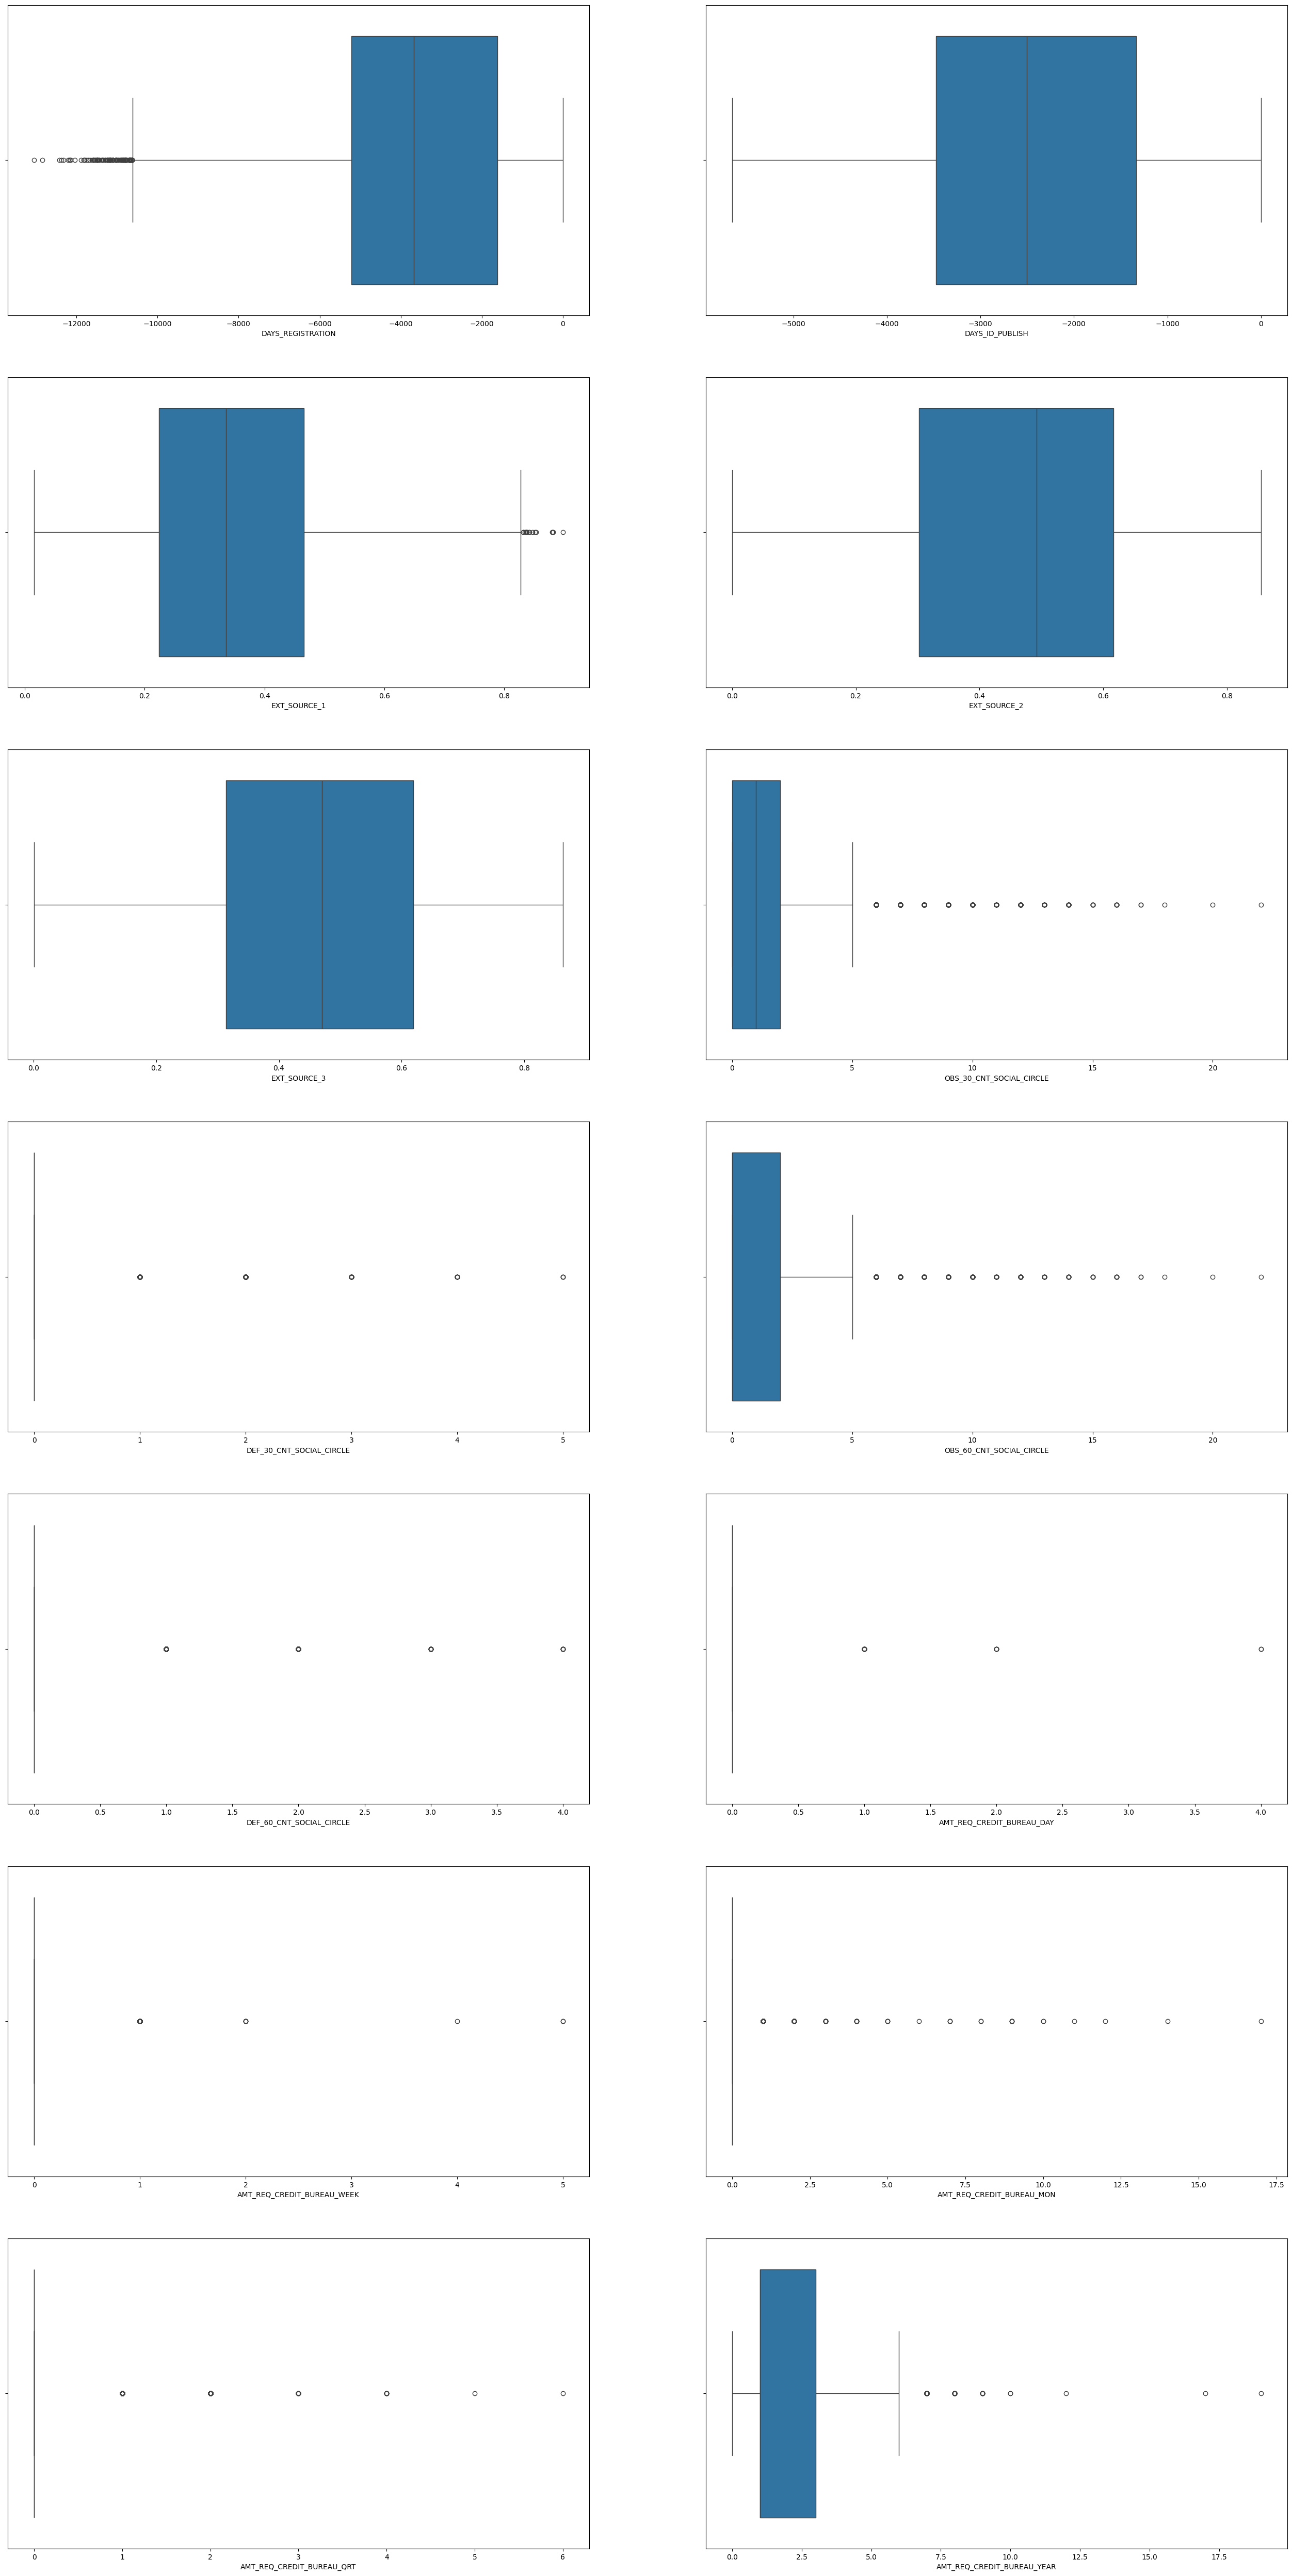

In [ ]:
# create boxplots
large_numeric_var = [
                "DAYS_REGISTRATION",
                "DAYS_ID_PUBLISH",
                "EXT_SOURCE_1",
                "EXT_SOURCE_2",
                "EXT_SOURCE_3",
                "OBS_30_CNT_SOCIAL_CIRCLE",
                "DEF_30_CNT_SOCIAL_CIRCLE",
                "OBS_60_CNT_SOCIAL_CIRCLE",
                "DEF_60_CNT_SOCIAL_CIRCLE",
                "AMT_REQ_CREDIT_BUREAU_DAY",
                "AMT_REQ_CREDIT_BUREAU_WEEK",
                "AMT_REQ_CREDIT_BUREAU_MON",
                "AMT_REQ_CREDIT_BUREAU_QRT",
                "AMT_REQ_CREDIT_BUREAU_YEAR"]

row_count=int(np.ceil(len(large_numeric_var)/2))

# create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=filtered_app_data, x = large_numeric_var[i],orient='h')
    axis.set_xlabel(str(large_numeric_var[i]))
    if i == len(large_numeric_var)-1: 
         break

# Show the plot
plt.show()


#### Dropping irrelevant columns with too many outliers

In [ ]:
# Dropping columns with too many outliers and irrelevant columns
unclean_merged_data.drop(["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1,inplace=True)
unclean_merged_data

SK_ID_CURR  TARGET FLAG_OWN_CAR FLAG_OWN_REALTY      NAME_INCOME_TYPE  \
0         100026       0            N               N               Working   
1         100041       0            N               N               Working   
2         100052       0            N               Y               Working   
3         100061       0            N               Y  Commercial associate   
4         100089       0            N               Y               Working   
...          ...     ...          ...             ...                   ...   
8266      456078       0            N               Y               Working   
8267      456108       1            N               Y               Working   
8268      456110       0            Y               Y  Commercial associate   
8269      456174       0            N               N               Working   
8270      456196       0            N               Y  Commercial associate   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0     Secondary / secondary special               Married   Rented apartment   
1                  Higher education               Married  House / apartment   
2     Secondary / secondary special        Civil marriage  House / apartment   
3                  Higher education               Married  House / apartment   
4     Secondary / secondary special        Civil marriage  House / apartment   
...                             ...                   ...                ...   
8266  Secondary / secondary special  Single / not married  House / apartment   
8267  Secondary / secondary special               Married  House / apartment   
8268  Secondary / secondary special               Married  House / apartment   
8269  Secondary / secondary special               Married  House / apartment   
8270  Secondary / secondary special        Civil marriage  House / apartment   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  ... FLAG_DOCUMENT_3  AGE  \
0               -114.00            -2518  ...               1   30   
1              -6265.00            -2009  ...               1   33   
2              -6591.00             -642  ...               0   21   
3              -2025.00            -1240  ...               1   28   
4              -4437.00            -2342  ...               1   26   
...                 ...              ...  ...             ...  ...   
8266           -1822.00            -1196  ...               1   23   
8267           -4771.00            -1915  ...               1   34   
8268             -72.00            -4629  ...               0   34   
8269           -2160.00            -2222  ...               1   30   
8270           -6804.00            -4414  ...               0   35   

      YEARS_EMPLOYED  DEBT_INCOME_RATIO  AVG_AMT_CREDIT_SUM  \
0                 11               1.11          1875000.00   
1                  3               4.00            63254.24   
2                  2               2.00                 NaN   
3                  3               1.40            37741.50   
4                  7               2.50           116545.50   
...              ...                ...                 ...   
8266               0               3.48                 NaN   
8267               5               3.39           168275.04   
8268               8               1.00          6760620.00   
8269               2               1.60            64469.25   
8270               9               1.78           125526.27   

      AVG_AMT_CREDIT_SUM_DEBT  AVG_AMT_CREDIT_SUM_OVERDUE  NUM_SOLD_LOANS  \
0                  1738907.19                        0.00            0.00   
1                        0.00                        0.00            0.00   
2                         NaN                         NaN             NaN   
3                        0.00                        0.00            0.00   
4                        0.00                        0.00            0.00   
...                       ...       

#### Dropping unncessary columns because of relative to business context
- SK_ID_CURR
- REGION_POPULATION_RELATIVE
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- AVG_AMT_CREDIT_SUM
- REGION_RATING_CLIENT

In [ ]:
# Drop unnecessary columns mentioned 
unclean_merged_data.drop(["SK_ID_CURR","DAYS_REGISTRATION","DAYS_ID_PUBLISH","AVG_AMT_CREDIT_SUM"], axis=1,inplace=True)
clean_merged_data = unclean_merged_data.copy()

In [ ]:
len(clean_merged_data.columns)

NameError: name 'clean_merged_data' is not defined

## 3. Grouping and Screening



### 3.1 Fine Classing
#### Generating WOE Bins 
Woebin() generate groupings as a python dictionary object and also provides a method to plot WOE for the bins.  It will optimize for IV, but will not attempt to make the trend monotonic.

Scorecardpy will automatically do the one-hot encoding as part of the binning process so it is not neccesary to do that in advance.

It will also create missing bins for all the variables, so there is no need to imput or remove missing values.

In [39]:
bins = sc.woebin(clean_merged_data, y='TARGET')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...


/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:136: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  binning_sv = pd.merge(
/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:136: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  binning_sv = pd.merge(
/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

ACTIVE_CLOSE_DEBT_RATIO  : 


/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:136: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  binning_sv = pd.merge(
/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:136: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  binning_sv = pd.merge(
/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

variable         bin  count  count_distr  good  bad  \
0  ACTIVE_CLOSE_DEBT_RATIO     missing   1816         0.22  1534  282   
1  ACTIVE_CLOSE_DEBT_RATIO  [-inf,0.0)   1244         0.15  1027  217   
2  ACTIVE_CLOSE_DEBT_RATIO   [0.0,0.5)   2428         0.29  2211  217   
3  ACTIVE_CLOSE_DEBT_RATIO   [0.5,1.1)   1867         0.23  1638  229   
4  ACTIVE_CLOSE_DEBT_RATIO   [1.1,inf)    916         0.11   774  142   

   badprob   woe  bin_iv  total_iv   breaks  is_special_values  
0     0.16  0.19    0.01      0.08  missing               True  
1     0.17  0.33    0.02      0.08      0.0              False  
2     0.09 -0.43    0.05      0.08      0.5              False  
3     0.12 -0.08    0.00      0.08      1.1              False  
4     0.16  0.19    0.00      0.08      inf              False

----------------------------------------------------------------------------------------------------
FLAG_DOCUMENT_3  : 


variable         bin  count  count_distr  good  bad  badprob   woe  \
0  FLAG_DOCUMENT_3  [-inf,1.0)   2440         0.30  2199  241     0.10 -0.32   
1  FLAG_DOCUMENT_3   [1.0,inf)   5831         0.70  4985  846     0.15  0.11   

   bin_iv  total_iv breaks  is_special_values  
0    0.03      0.04    1.0              False  
1    0.01      0.04    inf              False

----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


variable                               bin  count  count_distr  \
0  NAME_FAMILY_STATUS                   Widow%,%Married   4629         0.56   
1  NAME_FAMILY_STATUS                    Civil marriage   1153         0.14   
2  NAME_FAMILY_STATUS  Single / not married%,%Separated   2489         0.30   

   good  bad  badprob   woe  bin_iv  total_iv  \
0  4083  546     0.12 -0.12    0.01      0.02   
1   987  166     0.14  0.11    0.00      0.02   
2  2114  375     0.15  0.16    0.01      0.02   

                             breaks  is_special_values  
0                   Widow%,%Married              False  
1                    Civil marriage              False  
2  Single / not married%,%Separated              False

----------------------------------------------------------------------------------------------------
AVG_AMT_CREDIT_SUM_OVERDUE  : 


variable         bin  count  count_distr  good  bad  \
0  AVG_AMT_CREDIT_SUM_OVERDUE     missing   1809         0.22  1529  280   
1  AVG_AMT_CREDIT_SUM_OVERDUE  [-inf,inf)   6462         0.78  5655  807   

   badprob   woe  bin_iv  total_iv   breaks  is_special_values  
0     0.15  0.19    0.01      0.01  missing               True  
1     0.12 -0.06    0.00      0.01      inf              False

----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR  : 


variable bin  count  count_distr  good  bad  badprob   woe  bin_iv  \
0  FLAG_OWN_CAR   Y   2824         0.34  2519  305     0.11 -0.22    0.02   
1  FLAG_OWN_CAR   N   5447         0.66  4665  782     0.14  0.10    0.01   

   total_iv breaks  is_special_values  
0      0.02      Y              False  
1      0.02      N              False

----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


variable                                              bin  \
0  NAME_EDUCATION_TYPE               Academic degree%,%Higher education   
1  NAME_EDUCATION_TYPE                                Incomplete higher   
2  NAME_EDUCATION_TYPE  Secondary / secondary special%,%Lower secondary   

   count  count_distr  good  bad  badprob   woe  bin_iv  total_iv  \
0   1553         0.19  1430  123     0.08 -0.56    0.05      0.06   
1    556         0.07   479   77     0.14  0.06    0.00      0.06   
2   6162         0.75  5275  887     0.14  0.11    0.01      0.06   

                                            breaks  is_special_values  
0               Academic degree%,%Higher education              False  
1                                Incomplete higher              False  
2  Secondary / secondary special%,%Lower secondary              False

----------------------------------------------------------------------------------------------------
DEBT_INCOME_RATIO  : 


variable                                      bin  count  \
0  DEBT_INCOME_RATIO                [-inf,1.2000000000000002)   1253   
1  DEBT_INCOME_RATIO                 [1.2000000000000002,2.7)   4502   
2  DEBT_INCOME_RATIO                 [2.7,3.0000000000000004)    698   
3  DEBT_INCOME_RATIO  [3.0000000000000004,3.4000000000000004)    616   
4  DEBT_INCOME_RATIO                 [3.4000000000000004,inf)   1202   

   count_distr  good  bad  badprob   woe  bin_iv  total_iv  \
0         0.15  1137  116     0.09 -0.39    0.02      0.04   
1         0.54  3901  601     0.13  0.02    0.00      0.04   
2         0.08   619   79     0.11 -0.17    0.00      0.04   
3         0.07   501  115     0.19  0.42    0.02      0.04   
4         0.15  1026  176     0.15  0.13    0.00      0.04   

               breaks  is_special_values  
0  1.2000000000000002              False  
1                 2.7              False  
2  3.0000000000000004              False  
3  3.4000000000000004              False  
4                 inf              False

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY  : 


variable         bin  count  count_distr  good  bad  \
0  REGION_RATING_CLIENT_W_CITY  [-inf,3.0)   6864         0.83  6038  826   
1  REGION_RATING_CLIENT_W_CITY   [3.0,inf)   1407         0.17  1146  261   

   badprob   woe  bin_iv  total_iv breaks  is_special_values  
0     0.12 -0.10    0.01      0.04    3.0              False  
1     0.19  0.41    0.03      0.04    inf              False

----------------------------------------------------------------------------------------------------
NUM_SOLD_LOANS  : 


variable         bin  count  count_distr  good  bad  badprob   woe  \
0  NUM_SOLD_LOANS     missing   1809         0.22  1529  280     0.15  0.19   
1  NUM_SOLD_LOANS  [-inf,inf)   6462         0.78  5655  807     0.12 -0.06   

   bin_iv  total_iv   breaks  is_special_values  
0    0.01      0.01  missing               True  
1    0.00      0.01      inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_1  : 


variable          bin  count  count_distr  good  bad  badprob   woe  \
0  EXT_SOURCE_1      missing   3570         0.43  3016  554     0.16  0.19   
1  EXT_SOURCE_1  [-inf,0.18)    737         0.09   577  160     0.22  0.61   
2  EXT_SOURCE_1  [0.18,0.44)   2596         0.31  2294  302     0.12 -0.14   
3  EXT_SOURCE_1  [0.44,0.52)    520         0.06   485   35     0.07 -0.74   
4  EXT_SOURCE_1   [0.52,inf)    848         0.10   812   36     0.04 -1.23   

   bin_iv  total_iv   breaks  is_special_values  
0    0.02      0.19  missing               True  
1    0.04      0.19     0.18              False  
2    0.01      0.19     0.44              False  
3    0.03      0.19     0.52              False  
4    0.10      0.19      inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


variable          bin  count  count_distr  good  bad  badprob   woe  \
0  EXT_SOURCE_2      missing     19         0.00    17    2     0.11 -0.25   
1  EXT_SOURCE_2  [-inf,0.08)    454         0.05   321  133     0.29  1.01   
2  EXT_SOURCE_2  [0.08,0.34)   1926         0.23  1555  371     0.19  0.46   
3  EXT_SOURCE_2  [0.34,0.66)   4626         0.56  4126  500     0.11 -0.22   
4  EXT_SOURCE_2   [0.66,inf)   1246         0.15  1165   81     0.07 -0.78   

   bin_iv  total_iv   breaks  is_special_values  
0    0.00      0.23  missing               True  
1    0.08      0.23     0.08              False  
2    0.06      0.23     0.34              False  
3    0.03      0.23     0.66              False  
4    0.07      0.23      inf              False

----------------------------------------------------------------------------------------------------
YEARS_EMPLOYED  : 


variable         bin  count  count_distr  good  bad  badprob   woe  \
0  YEARS_EMPLOYED  [-inf,5.0)   6063         0.73  5189  874     0.14  0.11   
1  YEARS_EMPLOYED   [5.0,8.0)   1428         0.17  1280  148     0.10 -0.27   
2  YEARS_EMPLOYED   [8.0,inf)    780         0.09   715   65     0.08 -0.51   

   bin_iv  total_iv breaks  is_special_values  
0    0.01      0.04    5.0              False  
1    0.01      0.04    8.0              False  
2    0.02      0.04    inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


variable          bin  count  count_distr  good  bad  badprob   woe  \
0  EXT_SOURCE_3      missing   2456         0.30  2110  346     0.14  0.08   
1  EXT_SOURCE_3  [-inf,0.26)   1048         0.13   788  260     0.25  0.78   
2  EXT_SOURCE_3  [0.26,0.46)   1766         0.21  1512  254     0.14  0.10   
3  EXT_SOURCE_3  [0.46,0.68)   2111         0.26  1924  187     0.09 -0.44   
4  EXT_SOURCE_3  [0.68,0.74)    452         0.05   427   25     0.06 -0.95   
5  EXT_SOURCE_3   [0.74,inf)    438         0.05   423   15     0.03 -1.45   

   bin_iv  total_iv   breaks  is_special_values  
0    0.00      0.25  missing               True  
1    0.10      0.25     0.26              False  
2    0.00      0.25     0.46              False  
3    0.04      0.25     0.68              False  
4    0.03      0.25     0.74              False  
5    0.07      0.25      inf              False

----------------------------------------------------------------------------------------------------
AVG_AMT_CREDIT_SUM_DEBT  : 


variable                 bin  count  count_distr  good  bad  \
0  AVG_AMT_CREDIT_SUM_DEBT             missing   1999         0.24  1703  296   
1  AVG_AMT_CREDIT_SUM_DEBT      [-inf,40000.0)   3613         0.44  3238  375   
2  AVG_AMT_CREDIT_SUM_DEBT   [40000.0,90000.0)    987         0.12   840  147   
3  AVG_AMT_CREDIT_SUM_DEBT  [90000.0,310000.0)   1152         0.14   941  211   
4  AVG_AMT_CREDIT_SUM_DEBT      [310000.0,inf)    520         0.06   462   58   

   badprob   woe  bin_iv  total_iv    breaks  is_special_values  
0     0.15  0.14    0.00      0.06   missing               True  
1     0.10 -0.27    0.03      0.06   40000.0              False  
2     0.15  0.15    0.00      0.06   90000.0              False  
3     0.18  0.39    0.02      0.06  310000.0              False  
4     0.11 -0.19    0.00      0.06       inf              False

----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


variable                                   bin  count  count_distr  \
0  NAME_INCOME_TYPE  Commercial associate%,%State servant   2187         0.26   
1  NAME_INCOME_TYPE                               Working   6084         0.74   

   good  bad  badprob   woe  bin_iv  total_iv  \
0  1944  243     0.11 -0.19    0.01      0.01   
1  5240  844     0.14  0.06    0.00      0.01   

                                 breaks  is_special_values  
0  Commercial associate%,%State servant              False  
1                               Working              False

----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


variable bin  count  count_distr  good  bad  badprob   woe  bin_iv  \
0  FLAG_OWN_REALTY   Y   5281         0.64  4601  680     0.13 -0.02    0.00   
1  FLAG_OWN_REALTY   N   2990         0.36  2583  407     0.14  0.04    0.00   

   total_iv breaks  is_special_values  
0      0.00      Y              False  
1      0.00      N              False

----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


variable                                                bin  \
0  NAME_HOUSING_TYPE  Co-op apartment%,%Office apartment%,%House / a...   
1  NAME_HOUSING_TYPE  Rented apartment%,%With parents%,%Municipal ap...   

   count  count_distr  good  bad  badprob   woe  bin_iv  total_iv  \
0   6695         0.81  5851  844     0.13 -0.05    0.00      0.01   
1   1576         0.19  1333  243     0.15  0.19    0.01      0.01   

                                              breaks  is_special_values  
0  Co-op apartment%,%Office apartment%,%House / a...              False  
1  Rented apartment%,%With parents%,%Municipal ap...              False

----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


variable                                                bin  count  \
0  OCCUPATION_TYPE                                            missing    739   
1  OCCUPATION_TYPE  IT staff%,%Medicine staff%,%Accountants%,%Core...   1242   
2  OCCUPATION_TYPE                           Managers%,%Realty agents    441   
3  OCCUPATION_TYPE  High skill tech staff%,%Sales staff%,%Cooking ...   3376   
4  OCCUPATION_TYPE                                           Laborers   1474   
5  OCCUPATION_TYPE  Drivers%,%Security staff%,%Secretaries%,%Waite...    999   

   count_distr  good  bad  badprob   woe  bin_iv  total_iv  \
0         0.09   643   96     0.13 -0.01    0.00      0.07   
1         0.15  1141  101     0.08 -0.54    0.04      0.07   
2         0.05   393   48     0.11 -0.21    0.00      0.07   
3         0.41  2951  425     0.13 -0.05    0.00      0.07   
4         0.18  1251  223     0.15  0.16    0.01      0.07   
5         0.12   805  194     0.19  0.47    0.03      0.07   

                                              breaks  is_special_values  
0                                            missing               True  
1  IT staff%,%Medicine staff%,%Accountants%,%Core...              False  
2                           Managers%,%Realty agents              False  
3  High skill tech staff%,%Sales staff%,%Cooking ...              False  
4                                           Laborers              False  
5  Drivers%,%Security staff%,%Secretaries%,%Waite...              False

----------------------------------------------------------------------------------------------------
AGE  : 


variable          bin  count  count_distr  good  bad  badprob   woe  bin_iv  \
0      AGE  [-inf,24.0)    860         0.10   722  138     0.16  0.23    0.01   
1      AGE  [24.0,27.0)   1154         0.14  1014  140     0.12 -0.09    0.00   
2      AGE  [27.0,29.0)   1569         0.19  1337  232     0.15  0.14    0.00   
3      AGE  [29.0,35.0)   4082         0.49  3587  495     0.12 -0.09    0.00   
4      AGE   [35.0,inf)    606         0.07   524   82     0.14  0.03    0.00   

   total_iv breaks  is_special_values  
0      0.02   24.0              False  
1      0.02   27.0              False  
2      0.02   29.0              False  
3      0.02   35.0              False  
4      0.02    inf              False

----------------------------------------------------------------------------------------------------
BAD_DEBT_CLOSE_RATIO  : 


variable         bin  count  count_distr  good  bad  badprob  \
0  BAD_DEBT_CLOSE_RATIO     missing   3060         0.37  2561  499     0.16   
1  BAD_DEBT_CLOSE_RATIO  [-inf,inf)   5211         0.63  4623  588     0.11   

    woe  bin_iv  total_iv   breaks  is_special_values  
0  0.25    0.03      0.04  missing               True  
1 -0.17    0.02      0.04      inf              False

----------------------------------------------------------------------------------------------------


{'ACTIVE_CLOSE_DEBT_RATIO': <Figure size 640x480 with 2 Axes>,
 'FLAG_DOCUMENT_3': <Figure size 640x480 with 2 Axes>,
 'NAME_FAMILY_STATUS': <Figure size 640x480 with 2 Axes>,
 'AVG_AMT_CREDIT_SUM_OVERDUE': <Figure size 640x480 with 2 Axes>,
 'FLAG_OWN_CAR': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'DEBT_INCOME_RATIO': <Figure size 640x480 with 2 Axes>,
 'REGION_RATING_CLIENT_W_CITY': <Figure size 640x480 with 2 Axes>,
 'NUM_SOLD_LOANS': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_1': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 640x480 with 2 Axes>,
 'YEARS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>,
 'AVG_AMT_CREDIT_SUM_DEBT': <Figure size 640x480 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 640x480 with 2 Axes>,
 'FLAG_OWN_REALTY': <Figure size 640x480 with 2 Axes>,
 'NAME_HOUSING_TYPE': <Figure size 640x480 with 2 Axes>,
 'OCCUPATION_TYPE': <Figure 

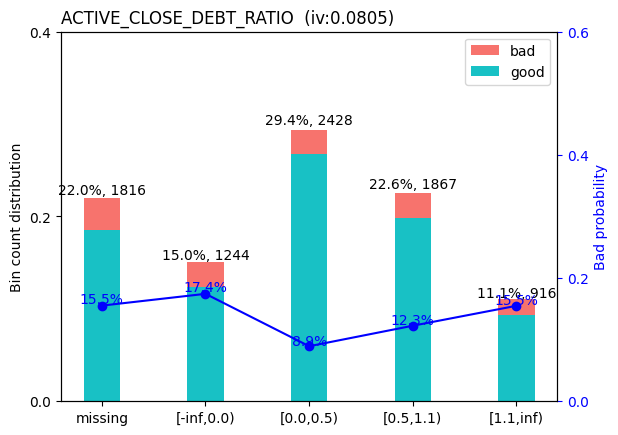

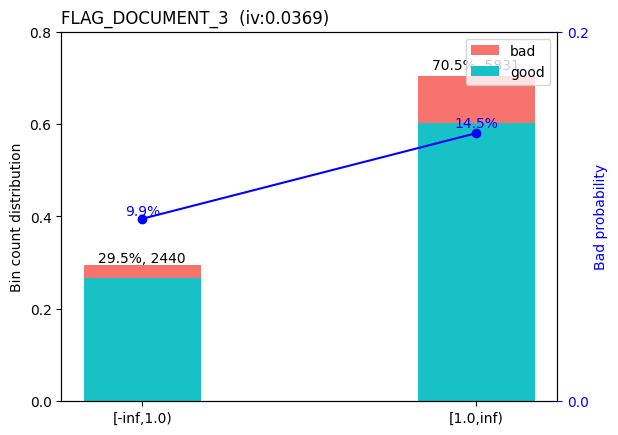

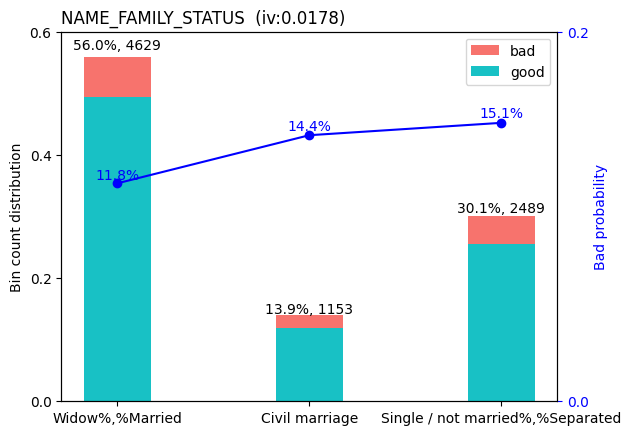

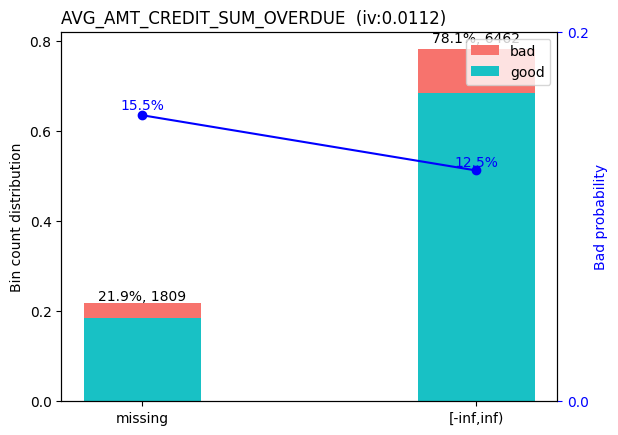

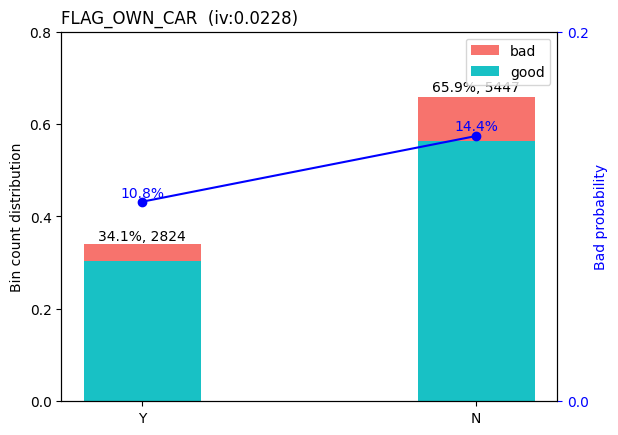

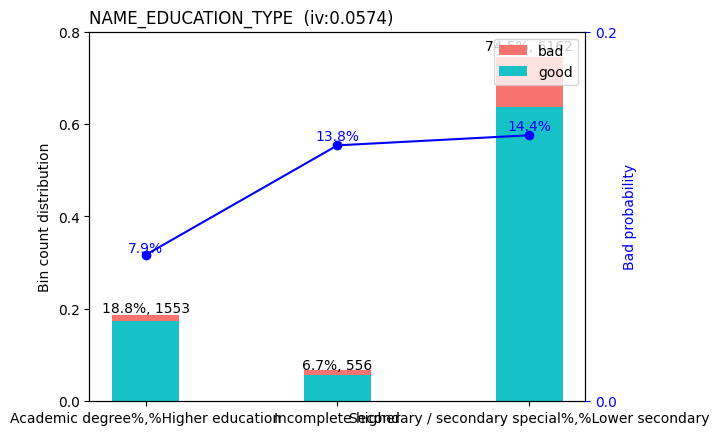

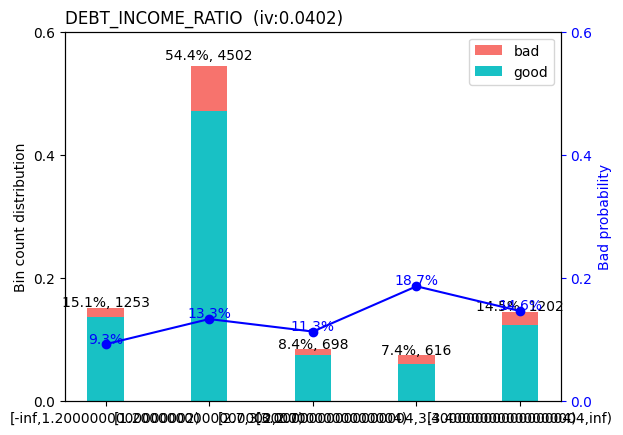

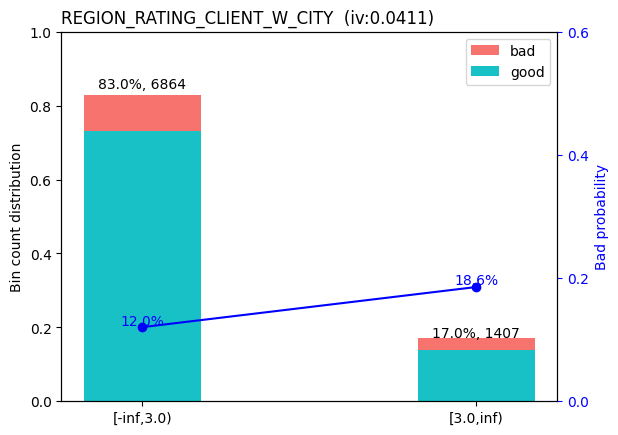

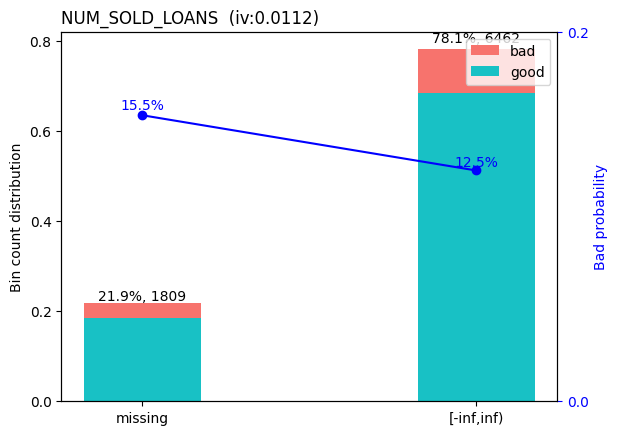

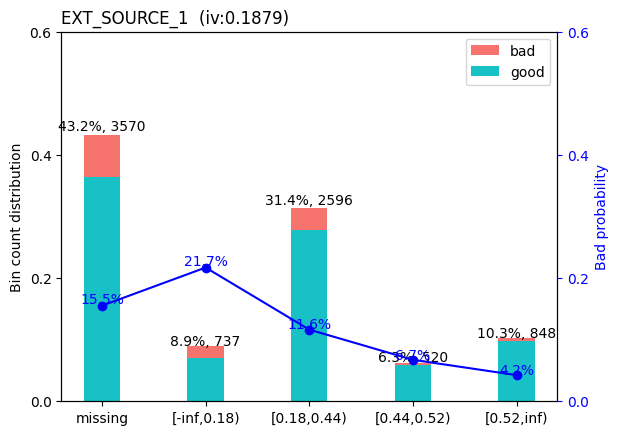

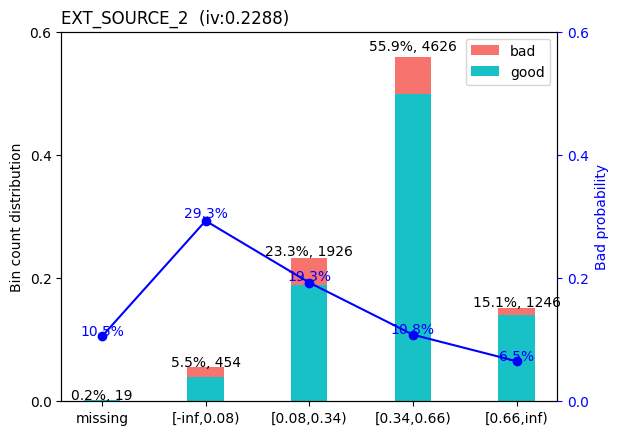

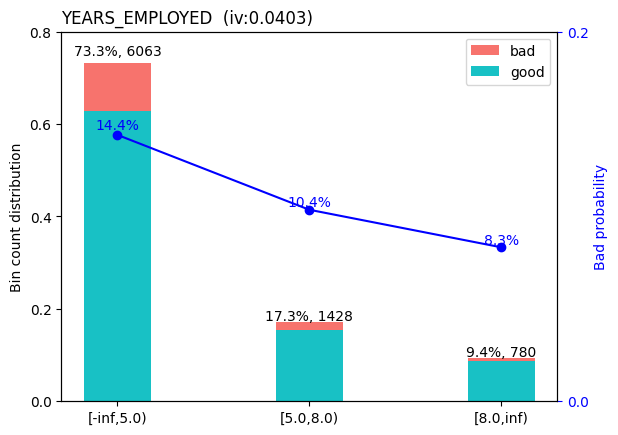

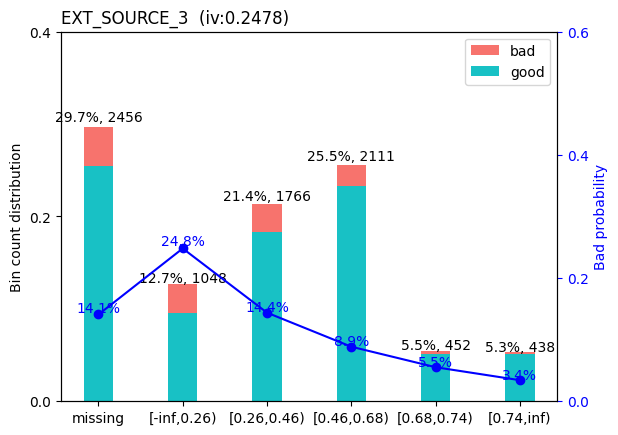

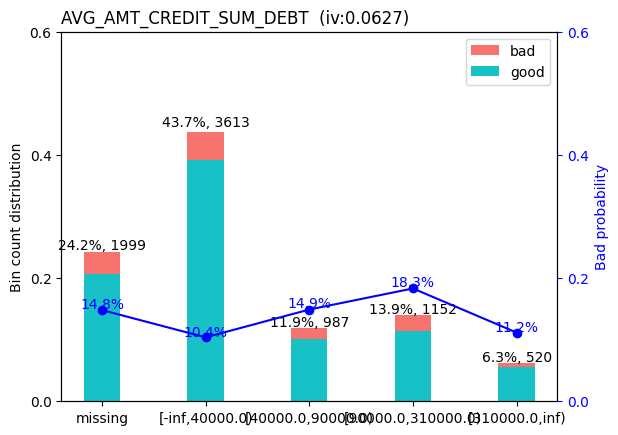

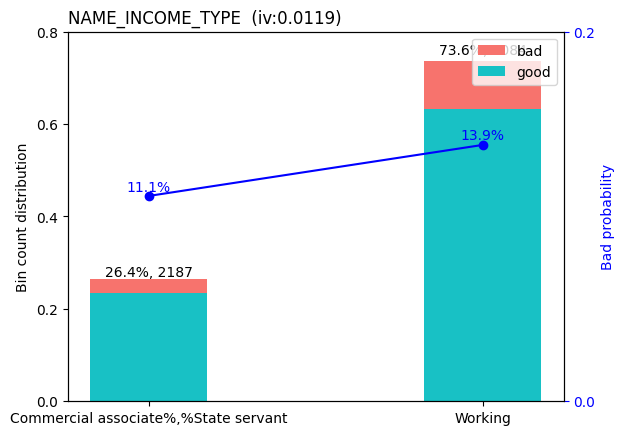

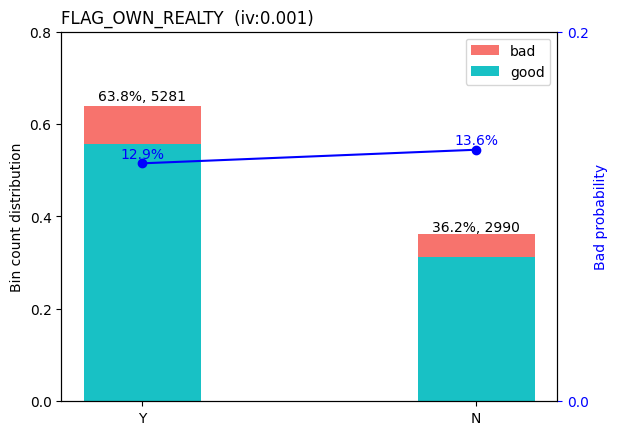

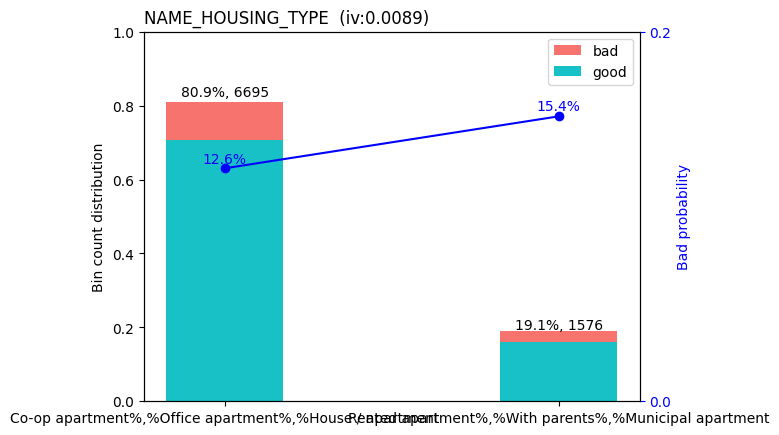

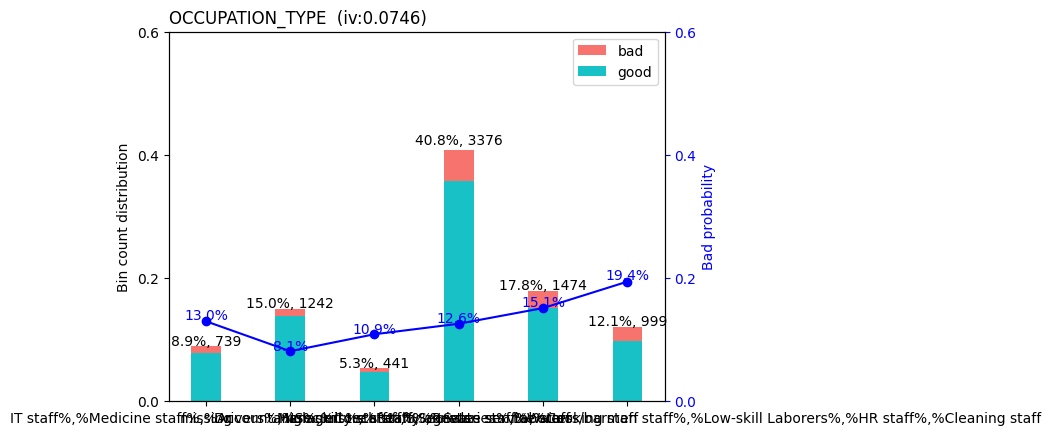

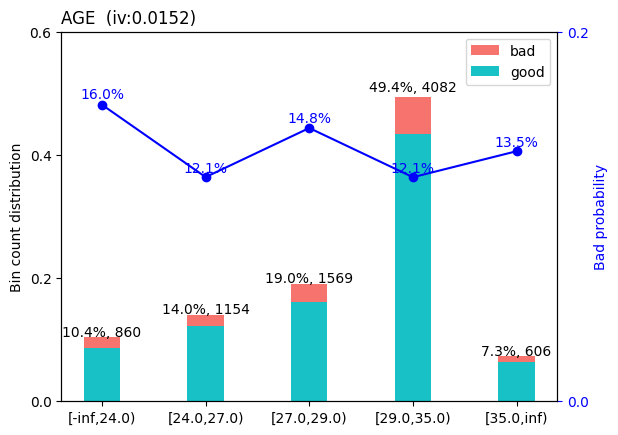

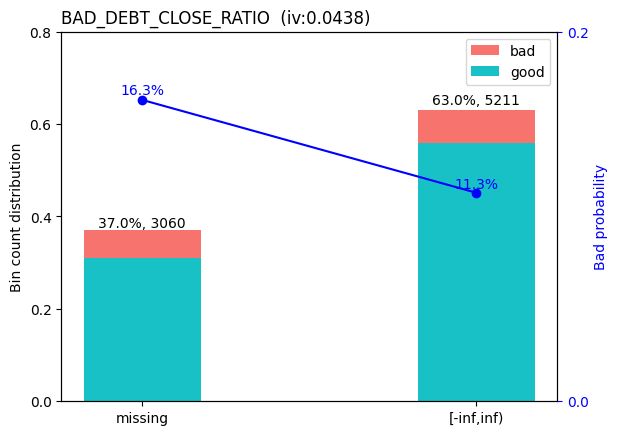

In [40]:
sc.woebin_plot(bins)

### Extract columns with IV >= 0.03
| Variable                  | Information Value |
|---------------------------|-------------------|
| NAME_FAMILY_STATUS        | 0.0178            |
| FLAG_OWN_CAR              | 0.0228            |
| NAME_INCOME_TYPE          | 0.0119            |
| AGE                       | 0.0152            |
| NUM_SOLD_LOANS            | 0.0112            |
| NAME_HOUSING_TYPE         | 0.0089            |
| FLAG_OWN_REALTY           | 0.001             |
| AVG_AMT_CREDIT_SUM_OVERDUE | 0.0112            |


In [41]:
## Drop variable with IV < 0.03
columns_to_drop = ["NAME_FAMILY_STATUS","FLAG_OWN_CAR","NAME_INCOME_TYPE","AGE","NUM_SOLD_LOANS","NAME_HOUSING_TYPE","FLAG_OWN_REALTY","AVG_AMT_CREDIT_SUM_OVERDUE"]

for col in columns_to_drop:
    clean_merged_data.drop(col, axis=1, inplace=True)

clean_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8271 entries, 0 to 8270
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       8271 non-null   int64  
 1   NAME_EDUCATION_TYPE          8271 non-null   object 
 2   OCCUPATION_TYPE              7532 non-null   object 
 3   REGION_RATING_CLIENT_W_CITY  8271 non-null   int64  
 4   EXT_SOURCE_1                 4701 non-null   float64
 5   EXT_SOURCE_2                 8252 non-null   float64
 6   EXT_SOURCE_3                 5815 non-null   float64
 7   FLAG_DOCUMENT_3              8271 non-null   int64  
 8   YEARS_EMPLOYED               8271 non-null   int64  
 9   DEBT_INCOME_RATIO            8271 non-null   float64
 10  AVG_AMT_CREDIT_SUM_DEBT      6272 non-null   float64
 11  ACTIVE_CLOSE_DEBT_RATIO      6455 non-null   float64
 12  BAD_DEBT_CLOSE_RATIO         5211 non-null   float64
dtypes: float64(7), int

## 3.2 Coarse Classing

#### Manual adjustment of sc.woebin groupings

[INFO] creating woe binning ...


/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_bin = dtm.groupby('bin', group_keys=False)['y'].agg([n0, n1])\
/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:410: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_iv_all_brks = pd.melt(
/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:410: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used d

{'AVG_AMT_CREDIT_SUM_DEBT': <Figure size 640x480 with 2 Axes>,
 'ACTIVE_CLOSE_DEBT_RATIO': <Figure size 640x480 with 2 Axes>,
 'FLAG_DOCUMENT_3': <Figure size 640x480 with 2 Axes>,
 'DEBT_INCOME_RATIO': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'BAD_DEBT_CLOSE_RATIO': <Figure size 640x480 with 2 Axes>,
 'REGION_RATING_CLIENT_W_CITY': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_1': <Figure size 640x480 with 2 Axes>,
 'OCCUPATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 640x480 with 2 Axes>,
 'YEARS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>}

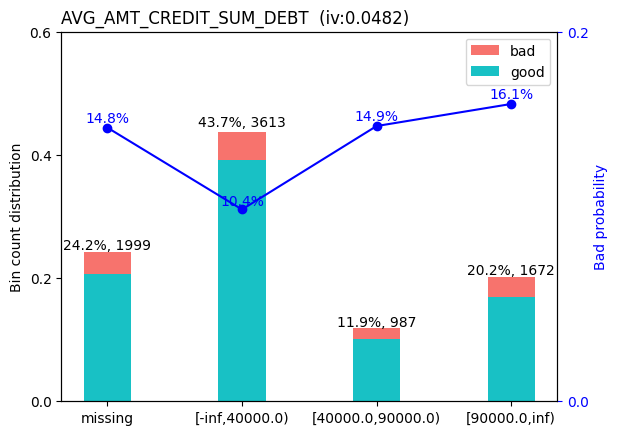

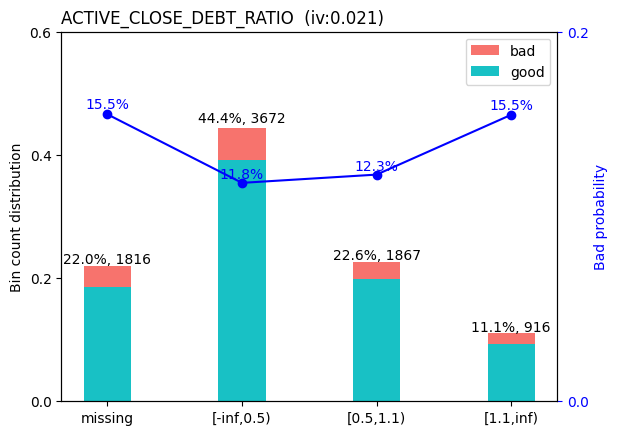

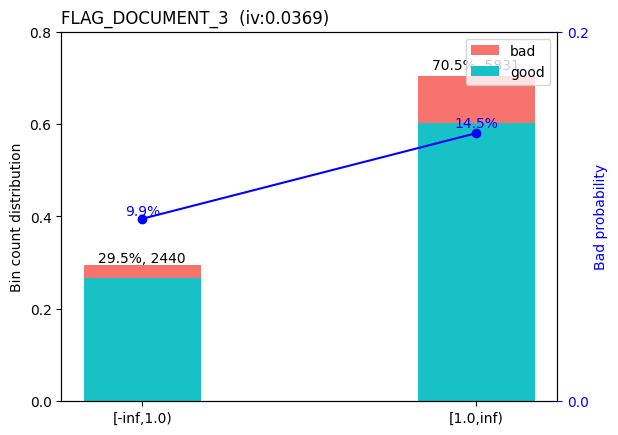

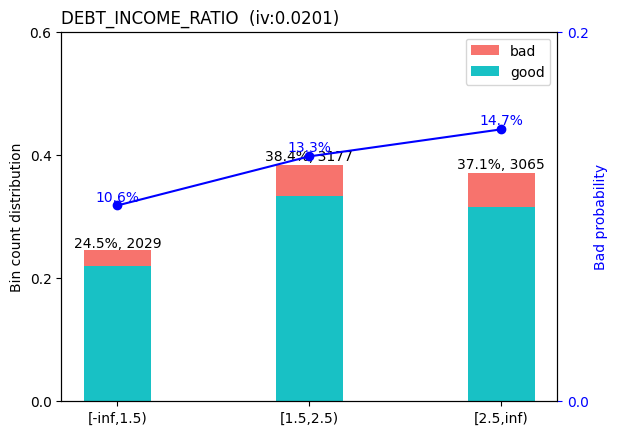

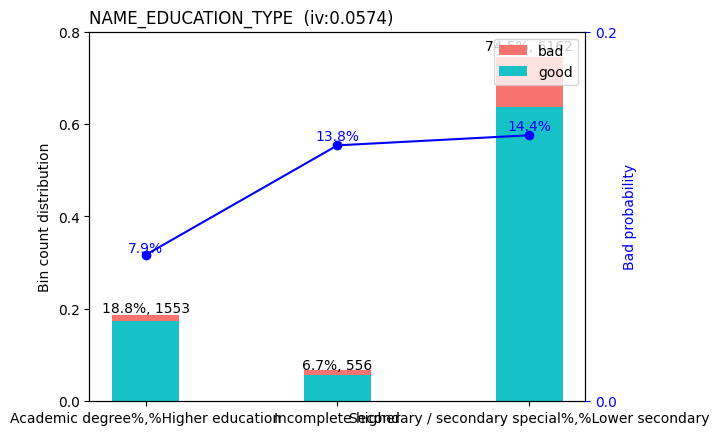

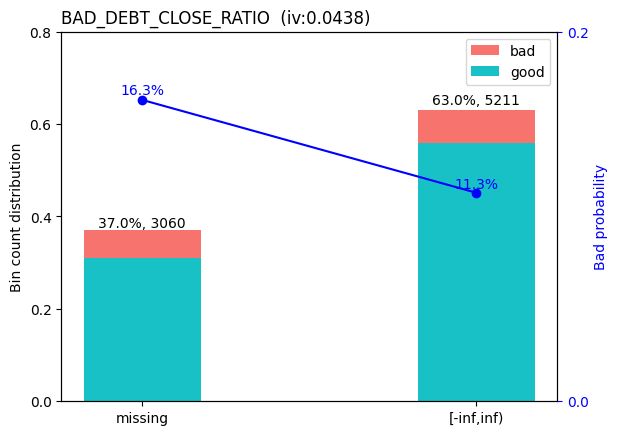

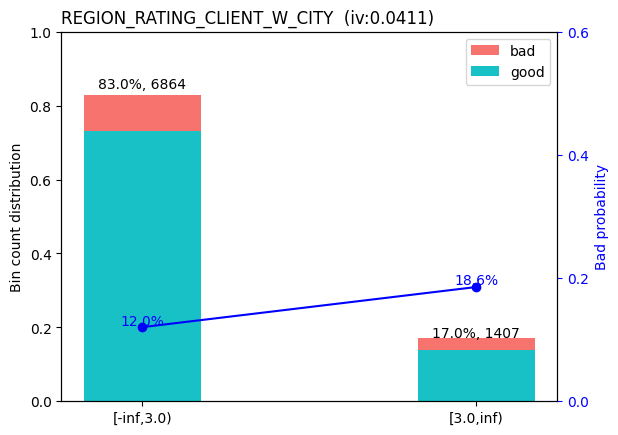

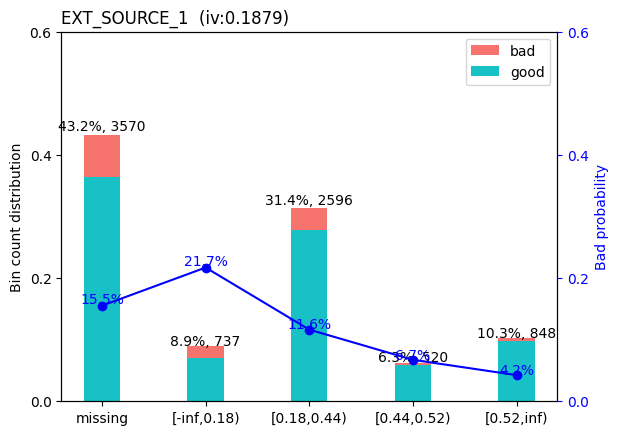

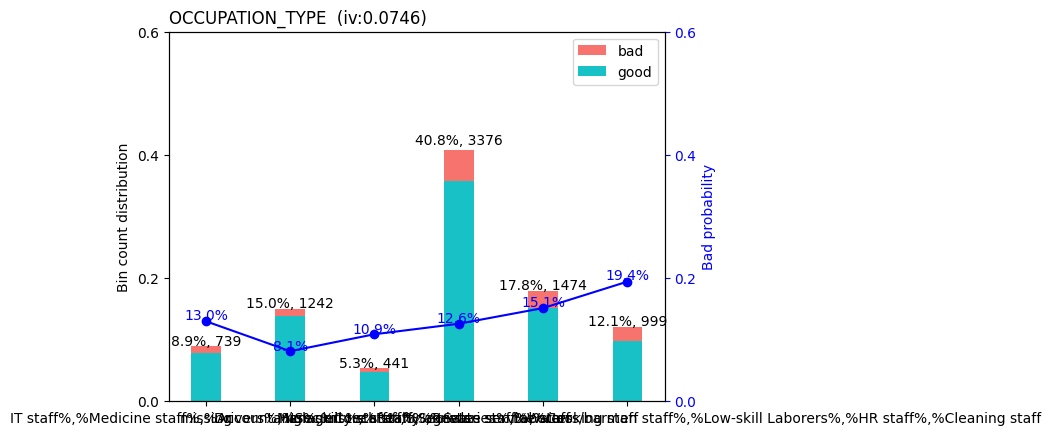

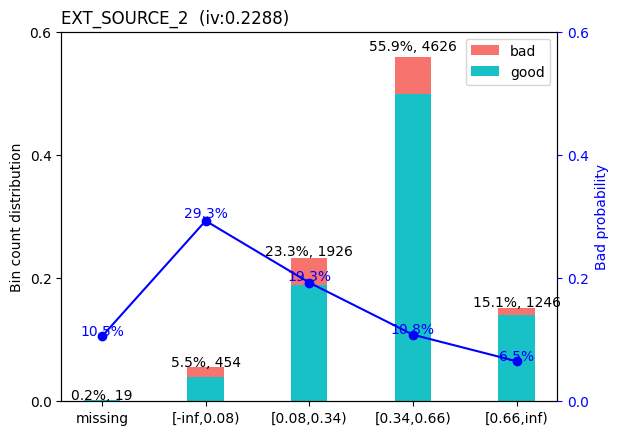

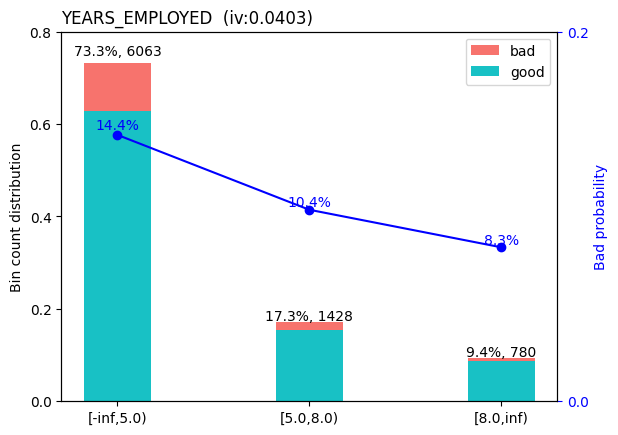

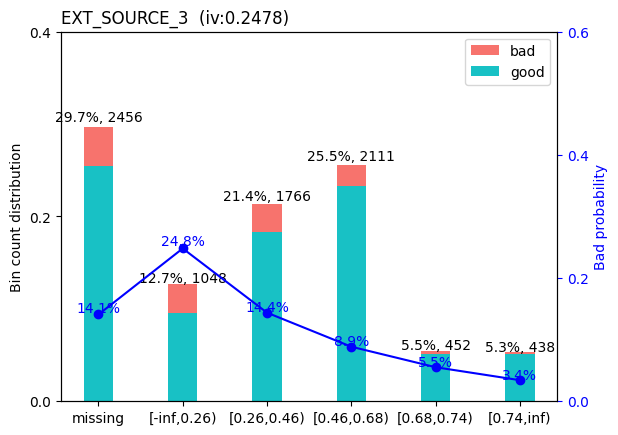

In [42]:
# # sample code

# bin adjustments for AVG_AMT_CREDIT_SUM_DEBT, DEBT_INCOME_RATIO, ACTIVE_CLOSE_DEBT_RATIO- reduce to 3 bins to make monotonic

########################## This is from when ACTIVE_CLOSE_DEBT_RATIO still existed
# breaks_adj = {'AVG_AMT_CREDIT_SUM_DEBT' : [40000, 90000],'DEBT_INCOME_RATIO' : [1.5,2.5],'ACTIVE_CLOSE_DEBT_RATIO':[0.5,1.1]}

breaks_adj = {'AVG_AMT_CREDIT_SUM_DEBT' : [40000, 90000],'DEBT_INCOME_RATIO' : [1.5,2.5]}

bins2 = sc.woebin(clean_merged_data, y='TARGET',breaks_list=breaks_adj)
sc.woebin_plot(bins2)

## 4. Create Scorecard

## 4.1 Logistic Regression with WOE encoding


In [43]:
train, test = sc.split_df(clean_merged_data, 'TARGET', ratio=0.7).values()
print(train.shape)
print(test.shape)

(5790, 13)
(2481, 13)


In [44]:
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train,bins2)
test_woe = sc.woebin_ply(test,bins2)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


TARGET  AVG_AMT_CREDIT_SUM_DEBT_woe  ACTIVE_CLOSE_DEBT_RATIO_woe  \
0          0                         0.24                         0.19   
1          0                        -0.27                        -0.12   
3          0                        -0.27                        -0.12   
4          0                        -0.27                        -0.12   
6          0                         0.14                         0.19   
...      ...                          ...                          ...   
8266       0                         0.14                         0.19   
8267       1                         0.24                        -0.08   
8268       0                         0.24                        -0.12   
8269       0                        -0.27                        -0.12   
8270       0                        -0.27                        -0.12   

      FLAG_DOCUMENT_3_woe  DEBT_INCOME_RATIO_woe  NAME_EDUCATION_TYPE_woe  \
0                    0.11                  -0.24                     0.11   
1                    0.11                   0.13                    -0.56   
3                    0.11                  -0.24                    -0.56   
4                    0.11                   0.13                     0.11   
6                    0.11                   0.13                     0.11   
...                   ...                    ...                      ...   
8266                 0.11                   0.13                     0.11   
8267                 0.11                   0.13                     0.11   
8268                -0.32                  -0.24                     0.11   
8269                 0.11                   0.01                     0.11   
8270                -0.32                   0.01                     0.11   

      BAD_DEBT_CLOSE_RATIO_woe  REGION_RATING_CLIENT_W_CITY_woe  \
0                        -0.17                            -0.10   
1                        -0.17                            -0.10   
3                        -0.17                            -0.10   
4                        -0.17                            -0.10   
6                         0.25                            -0.10   
...                        ...                              ...   
8266                      0.25                            -0.10   
8267                     -0.17                             0.41   
8268                      0.25                            -0.10   
8269                     -0.17                            -0.10   
8270                     -0.17                            -0.10   

      EXT_SOURCE_1_woe  OCCUPATION_TYPE_woe  EXT_SOURCE_2_woe  \
0                 0.19                -0.05             -0.22   
1                 0.19                -0.05             -0.78   
3                -0.14                -0.54             -0.78   
4                 0.19                 0.16             -0.22   
6                -1.23                -0.05             -0.22   
...                ...                  ...               ...   
8266              0.19                -0.01              0.46   
8267              0.19                 0.16              0.46   
8268             -0.14                -0.05             -0.22   
8269             -0.14                -0.05             -0.78   
8270              0.19                -0.05             -0.78   

      YEARS_EMPLOYED_woe  EXT_SOURCE_3_woe  
0                  -0.51              0.10  
1                   0.11             -0.44  
3                   0.11             -0.95  
4                  -0.27             -0.44  
6                   0.11              0.08  
...                  ...               ...  
8266                0.11              0.08  
8267               -0.27              0.78  
8268               -0.51              0.08  
8269                0.11             -1.45  
8270               -0.51             -0.44  

[5790 rows x 13 columns]

In [45]:
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'TARGET']
X_train = train_woe.loc[:,train_woe.columns != 'TARGET']
y_test = test_woe.loc[:,'TARGET']
X_test = test_woe.loc[:,train_woe.columns != 'TARGET']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 0.44494522  0.12634087  0.72559485  0.66875776  0.48930769 -0.07995203
   0.46100163  0.741698    0.74446224  0.70816315  0.50261588  0.94593008]]
[-1.90249103]


## 4.2 Generate scorecard

In [46]:
card = sc.scorecard(bins,lr, X_train.columns, points0 = 600, odds0 = 1/50, pdo = 20,
      basepoints_eq0 = True)

## 5. Analysis and Tuning

## 5.1 Score all the test data and train data

Text(0.5, 1.0, 'test data scores')

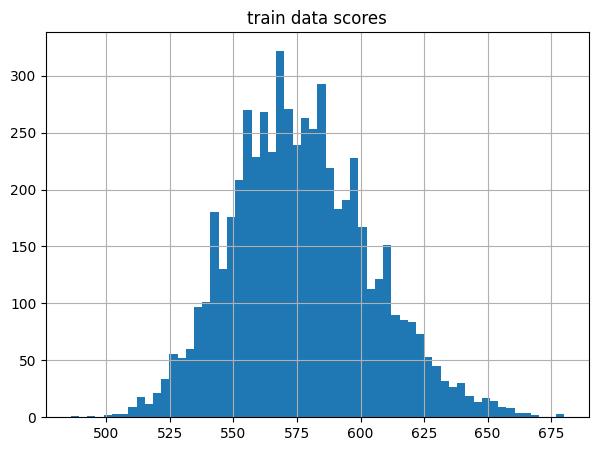

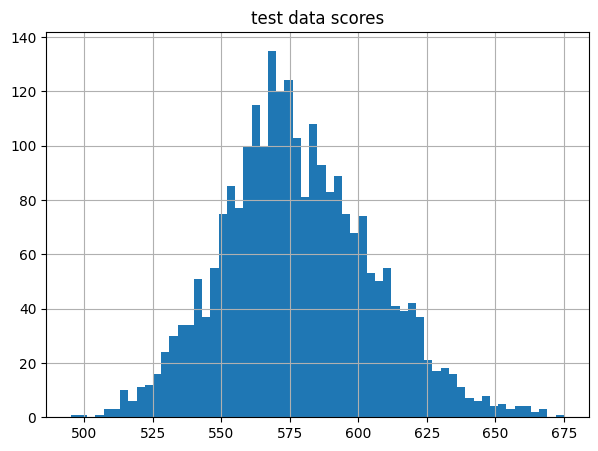

In [47]:
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

## 5.2 Percentage Correctly Classified measures on LR Model

In [48]:
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))

Confusion matrix:
[[2152  317]
 [   3    9]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2469
           1       0.03      0.75      0.05        12

    accuracy                           0.87      2481
   macro avg       0.51      0.81      0.49      2481
weighted avg       0.99      0.87      0.93      2481



### 5.3 Evaluate perfomance of logistic regression model with ROC


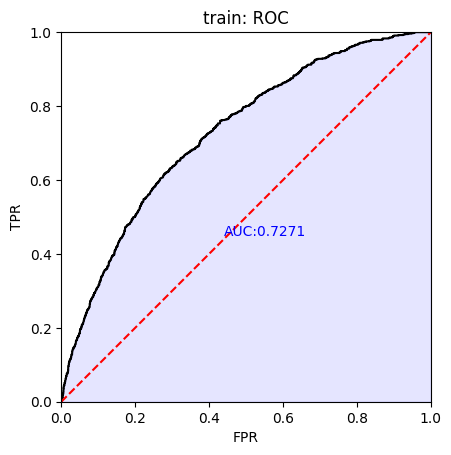

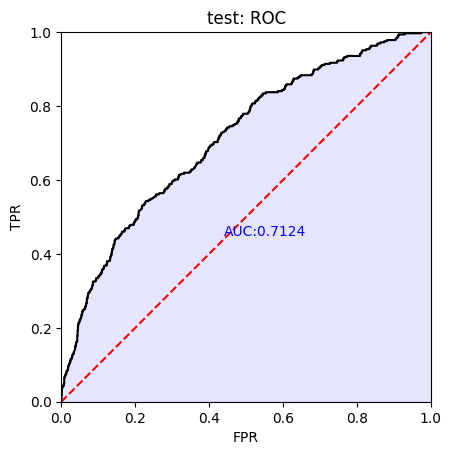

In [49]:
# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title = "test")

## 5.3 Tunning 

### Hyperparameter Tuning

In [59]:
from sklearn.metrics import get_scorer_names
fcustom_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)
scoring = {'AUC': 'roc_auc', 'F2': fcustom_scorer}
# parameter grid
parameters = {
    'penalty' : ['l1','l2','none', 'elasticnet'], 
    'C'       : [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
}

clf = GridSearchCV(LogisticRegression(
                random_state=42, 
                class_weight='balanced'),      
                param_grid = parameters,
                scoring=fcustom_scorer,
                cv=10)

clf.fit(X_train, y_train)

print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


### Model Selection: Best Performance
#### Hyperparameter Tuning applied onto LR

In [62]:
tuned_lr = LogisticRegression(penalty=clf.best_params_['penalty'], C=clf.best_params_['C'], solver=clf.best_params_['solver'], class_weight='balanced', random_state=42)
tuned_lr.fit(X_train, y_train)

new_card = sc.scorecard(bins,lr, X_train.columns, points0 = 600, odds0 = 1/50, pdo = 20,
      basepoints_eq0 = True)

y_pred_tuned = tuned_lr.predict(X_test)

print("\n")
print(25*"=", "LR" , 25*"=")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("\n")
print(25*"=", "Tuned LR" , 25*"=")
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))



========================= LR =========================
[[2152    3]
 [ 317    9]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2155
           1       0.75      0.03      0.05       326

    accuracy                           0.87      2481
   macro avg       0.81      0.51      0.49      2481
weighted avg       0.86      0.87      0.82      2481



========================= Tuned LR =========================
[[1392  763]
 [ 122  204]]
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      2155
           1       0.21      0.63      0.32       326

    accuracy                           0.64      2481
   macro avg       0.57      0.64      0.54      2481
weighted avg       0.83      0.64      0.70      2481



### Score all Test and Train Data

Text(0.5, 1.0, 'new card test data scores')

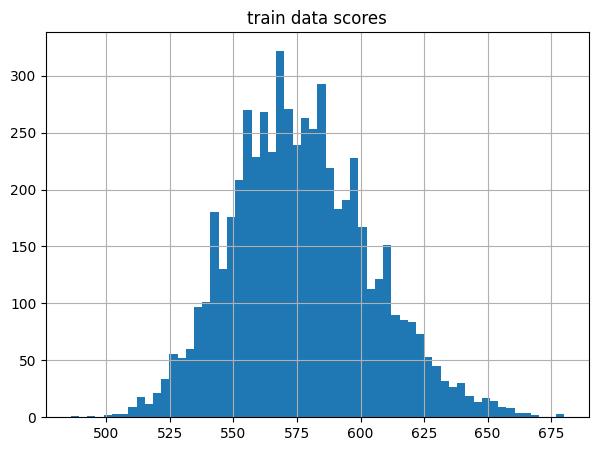

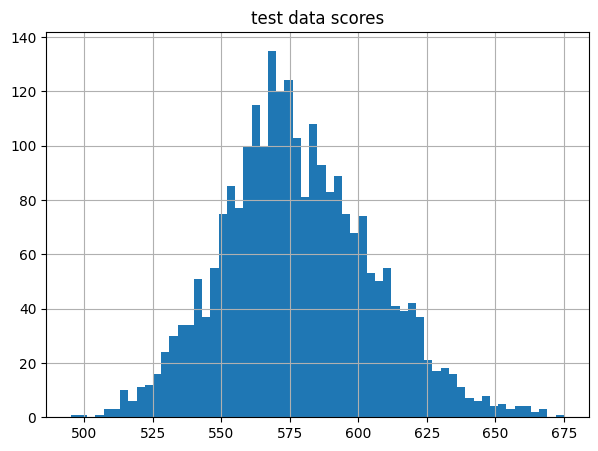

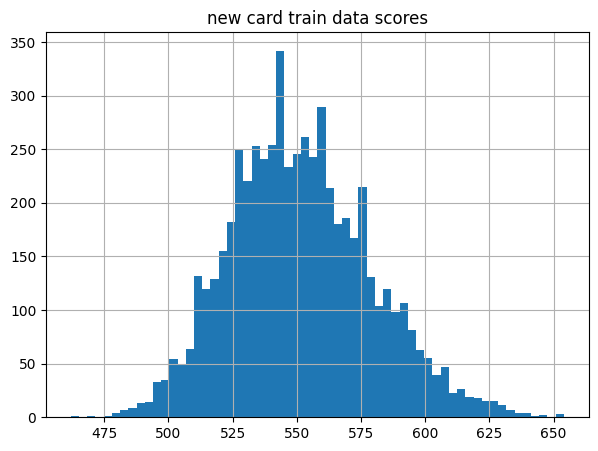

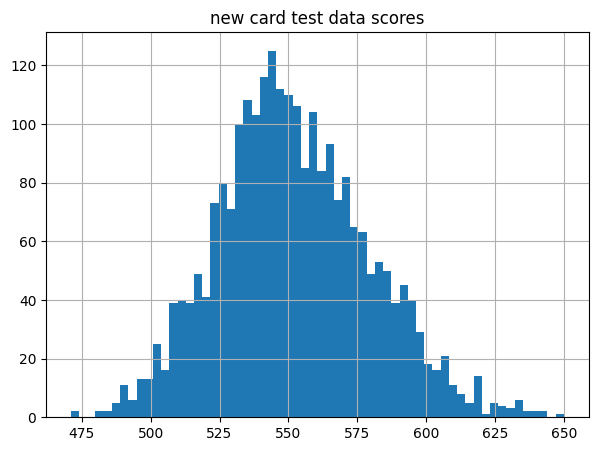

In [63]:
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

new_card_train_score = sc.scorecard_ply(train, new_card)
new_card_test_score = sc.scorecard_ply(test, new_card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

new_card_train_score.hist(figsize=(7,5),bins=60)
plt.title('new card train data scores')
new_card_test_score.hist(figsize=(7,5),bins=60)
plt.title('new card test data scores')

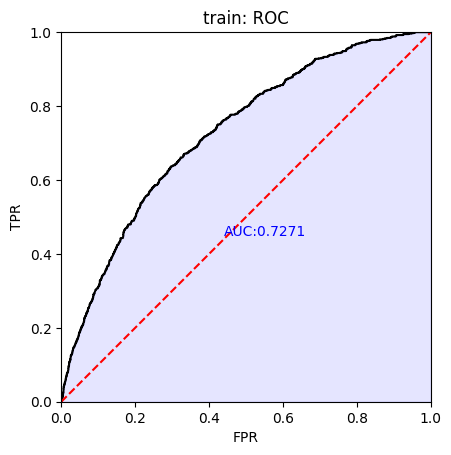

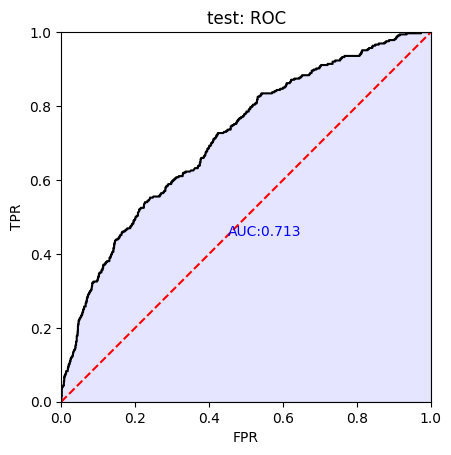

In [64]:
# evaluate the performance of the logistic regression
train_pred = tuned_lr.predict_proba(X_train)[:,1]
test_pred = tuned_lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title = "test")